Make radar charts

#Importing libraries and data

In [1567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN,AffinityPropagation,Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score,pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [1568]:
def compute_wcss(X, labels, centers):

    wcss = 0
    for i, center in enumerate(centers):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - center) ** 2)
    return wcss

def gap_statistic_from_labels(X, labels, random_state=42):
    # Scale X to [0,1] for generating uniform reference data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    labels = np.array(labels)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Compute cluster centers based on given labels
    centers = np.array([X_scaled[labels == lab].mean(axis=0) for lab in unique_labels])

    # Compute WCSS for original data
    orig_wcss = compute_wcss(X_scaled, labels, centers)

    # Generate uniform random reference data in [0,1]^d
    n_samples, n_features = X_scaled.shape
    random_data = np.random.RandomState(random_state).uniform(0, 1, size=(n_samples, n_features))

    # Assign random points to nearest original cluster centers
    assigned_labels, _ = pairwise_distances_argmin_min(random_data, centers)

    # Compute WCSS for reference data
    ref_wcss = compute_wcss(random_data, assigned_labels, centers)

    # Compute Gap statistic
    gap_value = np.log(ref_wcss) - np.log(orig_wcss)

    return gap_value


In [1569]:
df1=pd.read_csv('/content/findex.csv')
df1.head()

,Country Name,Series Name,2021,2022,2024
0,Afghanistan,Account (% age 15+),9.653822,NaN,NaN
1,Afghanistan,Mobile money account (% age 15+),0.000000,NaN,NaN
2,Afghanistan,Used a mobile phone or the internet to check a...,NaN,NaN,NaN
3,Afghanistan,Made a digital payment (% age 15+),4.714101,NaN,NaN
4,Afghanistan,Received digital payments (% age 15+),4.326349,NaN,NaN


In [1570]:
df1.columns

Index(['Country Name', 'Series Name', '2021', '2022', '2024'], dtype='object')

In [1571]:
df1.columns=['Country_Name', 'Series_Name', '2021', '2022', '2024']

d1=pd.pivot_table(
    df1,
    index='Country_Name',
    columns='Series_Name',
    values='2024'
)
d3=pd.pivot_table(
    df1,
    index='Country_Name',
    columns='Series_Name',
    values='2021'
)

In [1572]:
d1.head()

Series_Name,Account (% age 15+),Borrowed any money from a formal bank or similar financial institution or using a mobile money account (% age 15+),Borrowed from a formal bank or similar financial institution (% age 15+),Has an inactive account (% age 15+),Made a digital merchant payment (% age 15+),Made a digital payment (% age 15+),Made a utility payment: using a bank or similar financial institution account (% age 15+),Made a utility payment: using a mobile phone (% age 15+),Mobile money account (% age 15+),No account because of insufficient funds (% age 15+),...,Saved at a bank or similar financial institution (% age 15+),Saved at a bank or similar financial institution or using a mobile money account (% age 15+),Saved money using a mobile money account (% age 15+),Sent domestic remittances (% age 15+),"Sent money from a mobile money account, monthly (% age 15+) (% age 15+)",Used a mobile phone or the internet to buy something online (% age 15+),Used a mobile phone or the internet to check account balance (% age 15+),Used a mobile phone or the internet to pay bills (% age 15+),"Used an agent or someone else to make a mobile money payment, urban (% age 15+)",Used mobile phone or card to pay for in-store purchase (% age 15+)
Country_Name,,,,,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,10.846875,4.489219,11.083585,10.606868,1.952140,1.585356,NaN,43.413105,...,14.758060,14.758060,NaN,7.297490,NaN,12.575753,21.994162,5.364910,NaN,10.470086
Algeria,35.290107,6.544231,6.544231,22.196700,7.003443,NaN,NaN,NaN,NaN,NaN,...,16.551954,16.551954,NaN,NaN,NaN,6.781079,NaN,3.466288,NaN,5.688466
Argentina,81.744245,32.609741,29.268221,1.950963,60.193516,65.415519,23.959118,32.553275,56.739544,10.664341,...,23.122916,35.801684,32.068151,19.960042,NaN,36.395602,38.313536,43.917389,NaN,58.540083
Armenia,71.373473,23.359676,23.181125,2.086587,33.803891,38.552387,18.661269,19.591268,17.360269,9.366196,...,9.117360,10.837828,3.707404,21.073499,NaN,22.952919,37.011788,19.844688,NaN,29.361285
Australia,98.010378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1573]:
missdf=pd.DataFrame()
missdf['24']=d1.isna().sum()*100/d1.shape[0]
missdf['21']=d3.isna().sum()*100/d3.shape[0]
missdf[missdf['24']<=50]

,24,21
Series_Name,,
Account (% age 15+),0.000000,0.000000
Borrowed any money from a formal bank or similar financial institution or using a mobile money account (% age 15+),29.411765,1.481481
Borrowed from a formal bank or similar financial institution (% age 15+),29.411765,1.481481
Has an inactive account (% age 15+),29.411765,1.481481
Made a digital merchant payment (% age 15+),29.411765,34.074074
Made a digital payment (% age 15+),34.640523,1.481481
Made a utility payment: using a bank or similar financial institution account (% age 15+),34.640523,1.481481
Made a utility payment: using a mobile phone (% age 15+),34.640523,1.481481
Mobile money account (% age 15+),39.215686,42.222222


In [1574]:
d1.shape

(153, 32)

In [1575]:
df2=pd.read_csv('/content/socio-econ.csv')
df2.head()

,Country Name,Series Name,2021,2022,2024
0,Afghanistan,"Population, total",4.000041e+07,4.057884e+07,4.264749e+07
1,Afghanistan,Population growth (annual %),2.356098e+00,1.435704e+00,2.836573e+00
2,Afghanistan,Urban population (% of total population),2.631400e+01,2.661600e+01,2.726500e+01
3,Afghanistan,GDP per capita (current US$),3.564962e+02,3.572612e+02,NaN
4,Afghanistan,GDP growth (annual %),-2.073884e+01,-6.240172e+00,NaN


In [1576]:
df2.columns

Index(['Country Name', 'Series Name', '2021', '2022', '2024'], dtype='object')

In [1577]:
df2.columns=['Country_Name', 'Series_Name', '2021', '2022', '2024']

dd1=pd.pivot_table(
    df2,
    index='Country_Name',
    columns='Series_Name',
    values='2024'
)
dd3=pd.pivot_table(
    df2,
    index='Country_Name',
    columns='Series_Name',
    values='2021'
)

In [1578]:
dd1.head()

Series_Name,GDP growth (annual %),GDP per capita (current US$),Gini index,Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),Population growth (annual %),"Population, total",Urban population (% of total population)
Country_Name,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,2.836573,42647492.0,27.265000
Africa Eastern and Southern,2.766804,1673.841139,NaN,NaN,NaN,2.472935,769294618.0,38.949114
Africa Western and Central,4.176103,1284.154441,NaN,NaN,NaN,2.398473,521764076.0,50.280934
Albania,3.961719,10011.627986,NaN,NaN,NaN,-1.148424,2714617.0,65.380000
Algeria,3.300000,5631.179991,NaN,NaN,NaN,1.398387,46814308.0,75.748000


In [1579]:
dd1.isna().sum()*100/d1.shape[0]

,0
Series_Name,
GDP growth (annual %),21.568627
GDP per capita (current US$),21.568627
Gini index,171.895425
Individuals using the Internet (% of population),164.052288
Mobile cellular subscriptions (per 100 people),169.934641
Population growth (annual %),0.000000
"Population, total",0.000000
Urban population (% of total population),1.307190


In [1580]:
missdf1=pd.DataFrame()
missdf1['21']=dd3.isna().sum()*100/d3.shape[0]
missdf1['24']=dd1.isna().sum()*100/d1.shape[0]

missdf1[missdf1['24']<=50]

,21,24
Series_Name,,
GDP growth (annual %),5.925926,21.568627
GDP per capita (current US$),5.185185,21.568627
Population growth (annual %),0.000000,0.000000
"Population, total",0.000000,0.000000
Urban population (% of total population),1.481481,1.307190


In [1581]:
df=pd.merge(d1,dd1,left_index=True,right_index=True,how='outer')

In [1582]:
df.drop(columns=['Population, total','Population growth (annual %)','GDP growth (annual %)'],inplace=True)

In [1583]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
    'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
    'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
    'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
    'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
    'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
    "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
    'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
    'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
    'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon',
    'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
    'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
    'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
    'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica',
    'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Dem. People's Rep.",
    'Korea, Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon',
    'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
    'Macao SAR, China', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
    'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia, Fed. Sts.',
    'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
    'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand',
    'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Northern Mariana Islands',
    'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay',
    'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico (US)', 'Qatar', 'Romania',
    'Russian Federation', 'Rwanda', 'Samoa', 'San Marino', 'Sao Tome and Principe',
    'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia', 'Solomon Islands',
    'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis',
    'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Sudan',
    'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, China',
    'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
    'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Turkmenistan', 'Turks and Caicos Islands',
    'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
    'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Viet Nam', 'Virgin Islands (U.S.)',
    'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'
]

# Filter df by index in countries list
dff = df[df.index.isin(countries)]

In [1584]:
missdf=dff.isna().sum()*100/dff.shape[0]
list(missdf[missdf>60].index)

['Mobile money account  (% age 15+)',
 'No account because of insufficient funds  (% age 15+)',
 'Reason for not having a mobile money account: available mobile money products are too expensive, men (% age 15+)',
 "Reason for not having a mobile money account: don't have enough money to use a mobile money account  (% age 15+)",
 "Reason for not having a mobile money account: don't have the necessary documentation  (% age 15+)",
 'Reason for not having a mobile money account: mobile money agents are too far away  (% age 15+)',
 'Received payments for agricultural products: through a mobile phone, men (% age 15+)',
 'Received wages: into a bank or similar financial institution account (% of wage recipients, age 15+)',
 'Saved money using a mobile money account  (% age 15+)',
 'Sent money from a mobile money account, monthly (%  age 15+) (% age 15+)',
 'Used an agent or someone else to make a mobile money payment, urban (% age 15+)',
 'Gini index',
 'Individuals using the Internet (% of p

In [1585]:
dataset=dff.drop(columns=list(missdf[missdf>60].index))

In [1586]:
dataset.isna().sum()*100/dataset.shape[0]

,0
Series_Name,
Account (% age 15+),35.321101
Borrowed any money from a formal bank or similar financial institution or using a mobile money account (% age 15+),55.045872
Borrowed from a formal bank or similar financial institution (% age 15+),55.045872
Has an inactive account (% age 15+),55.045872
Made a digital merchant payment (% age 15+),55.045872
Made a digital payment (% age 15+),58.715596
Made a utility payment: using a bank or similar financial institution account (% age 15+),58.715596
Made a utility payment: using a mobile phone (% age 15+),58.715596
Owns a credit card (% age 15+),35.321101


In [1587]:
dataset.dropna(inplace=True)

In [1588]:
dataset.shape

(86, 23)

In [1589]:
dataset.head()

Series_Name,Account (% age 15+),Borrowed any money from a formal bank or similar financial institution or using a mobile money account (% age 15+),Borrowed from a formal bank or similar financial institution (% age 15+),Has an inactive account (% age 15+),Made a digital merchant payment (% age 15+),Made a digital payment (% age 15+),Made a utility payment: using a bank or similar financial institution account (% age 15+),Made a utility payment: using a mobile phone (% age 15+),Owns a credit card (% age 15+),Owns a debit card (% age 15+),...,Received government payments: through a mobile phone (% age 15+),Saved at a bank or similar financial institution (% age 15+),Saved at a bank or similar financial institution or using a mobile money account (% age 15+),Sent domestic remittances (% age 15+),Used a mobile phone or the internet to buy something online (% age 15+),Used a mobile phone or the internet to check account balance (% age 15+),Used a mobile phone or the internet to pay bills (% age 15+),Used mobile phone or card to pay for in-store purchase (% age 15+),GDP per capita (current US$),Urban population (% of total population)
Country_Name,,,,,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,10.846875,4.489219,11.083585,10.606868,1.952140,1.585356,7.357414,32.783771,...,0.426838,14.758060,14.758060,7.297490,12.575753,21.994162,5.364910,10.470086,10011.627986,65.380
Argentina,81.744245,32.609741,29.268221,1.950963,60.193516,65.415519,23.959118,32.553275,29.911506,64.068094,...,6.570712,23.122916,35.801684,19.960042,36.395602,38.313536,43.917389,58.540083,13858.203980,92.579
Armenia,71.373473,23.359676,23.181125,2.086587,33.803891,38.552387,18.661269,19.591268,7.687952,43.713116,...,3.003107,9.117360,10.837828,21.073499,22.952919,37.011788,19.844688,29.361285,8500.605225,63.929
Azerbaijan,56.304666,22.216869,22.216869,1.253056,34.239551,31.340120,12.873088,21.614775,13.381967,49.282930,...,5.187581,16.961626,16.961626,11.629979,12.116033,26.585659,26.148469,34.038360,7283.835630,57.997
Bangladesh,43.283973,13.147410,12.723885,3.435720,2.761961,28.133104,10.497879,11.952229,1.727212,7.668213,...,3.325594,9.658462,10.620231,9.921425,7.112083,6.602239,6.560801,2.366500,2593.416074,41.230


In [1590]:
dataset.columns

Index(['Account  (% age 15+)',
       'Borrowed any money from a formal bank or similar financial institution or using a mobile money account  (% age 15+)',
       'Borrowed from a formal bank or similar financial institution  (% age 15+)',
       'Has an inactive account  (% age 15+)',
       'Made a digital merchant payment  (% age 15+)',
       'Made a digital payment  (% age 15+)',
       'Made a utility payment: using a bank or similar financial institution account  (% age 15+)',
       'Made a utility payment: using a mobile phone  (% age 15+)',
       'Owns a credit card  (% age 15+)', 'Owns a debit card  (% age 15+)',
       'Received digital payments  (% age 15+)',
       'Received domestic remittances  (% age 15+)',
       'Received government payments: into a bank or similar financial institution account  (% age 15+)',
       'Received government payments: through a mobile phone  (% age 15+)',
       'Saved at a bank or similar financial institution  (% age 15+)',
       'Sa

In [1591]:
dataset.columns=[
    "acct",
    "borrow_any",
    "borrow_bank",
    "inactive_acct",
    "dig_merchant_pay",
    "dig_pay",
    "util_pay_bank",
    "util_pay_mobile",
    "credit_card",
    "debit_card",
    "recv_dig_pay",
    "recv_dom_remit",
    "gov_pay_bank",
    "gov_pay_mobile",
    "save_bank",
    "save_bank_mobile",
    "send_dom_remit",
    "online_buy",
    "check_balance",
    "pay_bills_online",
    "instore_pay",
    "gdp_pc",
    "urban_pop"]

In [1592]:
dataset.isna().sum()

,0
acct,0
borrow_any,0
borrow_bank,0
inactive_acct,0
dig_merchant_pay,0
dig_pay,0
util_pay_bank,0
util_pay_mobile,0
credit_card,0
debit_card,0


In [1593]:
df=dataset.copy()

In [1594]:
df.head()

,acct,borrow_any,borrow_bank,inactive_acct,dig_merchant_pay,dig_pay,util_pay_bank,util_pay_mobile,credit_card,debit_card,...,gov_pay_mobile,save_bank,save_bank_mobile,send_dom_remit,online_buy,check_balance,pay_bills_online,instore_pay,gdp_pc,urban_pop
Country_Name,,,,,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,10.846875,4.489219,11.083585,10.606868,1.952140,1.585356,7.357414,32.783771,...,0.426838,14.758060,14.758060,7.297490,12.575753,21.994162,5.364910,10.470086,10011.627986,65.380
Argentina,81.744245,32.609741,29.268221,1.950963,60.193516,65.415519,23.959118,32.553275,29.911506,64.068094,...,6.570712,23.122916,35.801684,19.960042,36.395602,38.313536,43.917389,58.540083,13858.203980,92.579
Armenia,71.373473,23.359676,23.181125,2.086587,33.803891,38.552387,18.661269,19.591268,7.687952,43.713116,...,3.003107,9.117360,10.837828,21.073499,22.952919,37.011788,19.844688,29.361285,8500.605225,63.929
Azerbaijan,56.304666,22.216869,22.216869,1.253056,34.239551,31.340120,12.873088,21.614775,13.381967,49.282930,...,5.187581,16.961626,16.961626,11.629979,12.116033,26.585659,26.148469,34.038360,7283.835630,57.997
Bangladesh,43.283973,13.147410,12.723885,3.435720,2.761961,28.133104,10.497879,11.952229,1.727212,7.668213,...,3.325594,9.658462,10.620231,9.921425,7.112083,6.602239,6.560801,2.366500,2593.416074,41.230


In [1595]:
df.shape

(86, 23)

In [1596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, Albania to Zimbabwe
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct              86 non-null     float64
 1   borrow_any        86 non-null     float64
 2   borrow_bank       86 non-null     float64
 3   inactive_acct     86 non-null     float64
 4   dig_merchant_pay  86 non-null     float64
 5   dig_pay           86 non-null     float64
 6   util_pay_bank     86 non-null     float64
 7   util_pay_mobile   86 non-null     float64
 8   credit_card       86 non-null     float64
 9   debit_card        86 non-null     float64
 10  recv_dig_pay      86 non-null     float64
 11  recv_dom_remit    86 non-null     float64
 12  gov_pay_bank      86 non-null     float64
 13  gov_pay_mobile    86 non-null     float64
 14  save_bank         86 non-null     float64
 15  save_bank_mobile  86 non-null     float64
 16  send_dom_remit    86 non-null     float

In [1597]:
df.describe().round(2)

,acct,borrow_any,borrow_bank,inactive_acct,dig_merchant_pay,dig_pay,util_pay_bank,util_pay_mobile,credit_card,debit_card,...,gov_pay_mobile,save_bank,save_bank_mobile,send_dom_remit,online_buy,check_balance,pay_bills_online,instore_pay,gdp_pc,urban_pop
count,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,...,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00
mean,59.73,16.14,13.47,2.43,25.72,41.26,12.91,16.44,8.83,33.83,...,4.32,18.33,27.02,24.68,16.18,24.73,20.50,24.44,5904.32,54.82
std,19.09,9.14,9.01,2.54,20.19,18.90,12.59,12.06,9.21,24.58,...,3.73,11.79,13.55,12.75,13.55,18.88,14.93,19.97,5634.60,18.77
min,14.83,1.37,1.37,0.11,2.42,6.88,0.45,0.57,0.36,1.82,...,0.00,3.31,5.23,4.95,1.30,2.21,1.59,2.25,508.37,17.23
25%,45.61,10.17,6.75,0.98,9.93,27.44,3.18,7.11,2.67,11.48,...,2.06,8.71,16.32,13.42,6.08,9.27,8.09,8.84,1723.76,40.45
50%,59.48,13.75,11.66,1.68,19.92,42.56,9.70,14.00,5.95,29.18,...,3.31,15.05,25.92,22.56,11.70,21.51,17.33,17.95,3989.11,55.41
75%,72.90,20.01,17.03,2.85,37.72,54.62,18.34,24.18,12.28,49.37,...,5.35,24.14,34.84,33.57,20.37,35.35,27.09,36.76,8376.95,69.16
max,98.28,46.92,45.92,14.35,94.94,88.11,69.28,57.70,43.67,88.78,...,25.04,49.34,67.20,55.24,54.05,76.44,63.09,94.94,25022.67,92.58


In [1598]:
df.duplicated().sum()

np.int64(0)

#EDA

In [1599]:
df.corr()

,acct,borrow_any,borrow_bank,inactive_acct,dig_merchant_pay,dig_pay,util_pay_bank,util_pay_mobile,credit_card,debit_card,...,gov_pay_mobile,save_bank,save_bank_mobile,send_dom_remit,online_buy,check_balance,pay_bills_online,instore_pay,gdp_pc,urban_pop
acct,1.000000,0.691327,0.620945,0.053326,0.804990,0.784435,0.679176,0.725291,0.552707,0.732415,...,0.488318,0.718478,0.698266,0.135126,0.710163,0.767689,0.791832,0.794931,0.525825,0.233485
borrow_any,0.691327,1.000000,0.870657,-0.132973,0.689057,0.668720,0.654938,0.718866,0.708308,0.560574,...,0.581741,0.473936,0.469988,0.119649,0.582018,0.602086,0.724597,0.682770,0.434471,0.212729
borrow_bank,0.620945,0.870657,1.000000,0.006729,0.726981,0.434324,0.783714,0.591089,0.845794,0.733411,...,0.471460,0.546377,0.218785,-0.215516,0.704097,0.722558,0.672149,0.722187,0.595772,0.348665
inactive_acct,0.053326,-0.132973,0.006729,1.000000,-0.205219,-0.401872,-0.100877,-0.341943,-0.064406,0.047537,...,-0.271488,0.077485,-0.206858,-0.393864,-0.041259,-0.010073,-0.268695,-0.208412,-0.044531,-0.082180
dig_merchant_pay,0.804990,0.689057,0.726981,-0.205219,1.000000,0.670428,0.867154,0.778238,0.671748,0.870815,...,0.571480,0.738018,0.490046,-0.083284,0.861101,0.918518,0.875928,0.998439,0.691647,0.336622
dig_pay,0.784435,0.668720,0.434324,-0.401872,0.670428,1.000000,0.506730,0.817942,0.376758,0.375964,...,0.573299,0.447271,0.805706,0.550807,0.511262,0.487626,0.800573,0.661500,0.285065,0.121113
util_pay_bank,0.679176,0.654938,0.783714,-0.100877,0.867154,0.506730,1.000000,0.677099,0.684158,0.854993,...,0.503709,0.694064,0.300924,-0.280885,0.826200,0.870922,0.755220,0.868268,0.646715,0.300347
util_pay_mobile,0.725291,0.718866,0.591089,-0.341943,0.778238,0.817942,0.677099,1.000000,0.462053,0.551678,...,0.724357,0.474199,0.555067,0.256551,0.643080,0.627574,0.921161,0.774839,0.363698,0.120176
credit_card,0.552707,0.708308,0.845794,-0.064406,0.671748,0.376758,0.684158,0.462053,1.000000,0.759608,...,0.238938,0.566143,0.229859,-0.306820,0.678165,0.685665,0.640778,0.664196,0.760702,0.472242
debit_card,0.732415,0.560574,0.733411,0.047537,0.870815,0.375964,0.854993,0.551678,0.759608,1.000000,...,0.379954,0.793616,0.295409,-0.407328,0.849732,0.940799,0.699665,0.867263,0.773597,0.423554


In [1600]:
high_corr = [(col1, col2) for col1 in df.corr().columns
             for col2 in df.corr().columns
             if col1 != col2 and abs(df.corr().loc[col1, col2]) > 0.9]

In [1601]:
high_corr

[('acct', 'recv_dig_pay'),
 ('dig_merchant_pay', 'check_balance'),
 ('dig_merchant_pay', 'instore_pay'),
 ('util_pay_mobile', 'pay_bills_online'),
 ('debit_card', 'check_balance'),
 ('recv_dig_pay', 'acct'),
 ('recv_dom_remit', 'send_dom_remit'),
 ('send_dom_remit', 'recv_dom_remit'),
 ('check_balance', 'dig_merchant_pay'),
 ('check_balance', 'debit_card'),
 ('check_balance', 'instore_pay'),
 ('pay_bills_online', 'util_pay_mobile'),
 ('instore_pay', 'dig_merchant_pay'),
 ('instore_pay', 'check_balance')]

In [1602]:
df['borrow_mobile']=df['borrow_any']-df['borrow_bank']
df['save_mobile']=df['save_bank_mobile']-df['save_bank']

In [1603]:
df.drop(columns=['instore_pay','util_pay_mobile','recv_dom_remit','check_balance','recv_dig_pay','util_pay_bank',
                 'borrow_any','dig_merchant_pay','save_bank_mobile'],inplace=True)#high correlation

In [1604]:
high_corr = [(col1, col2) for col1 in df.corr().columns
             for col2 in df.corr().columns
             if col1 != col2 and abs(df.corr().loc[col1, col2]) > 0.8]

In [1605]:
high_corr

[('borrow_bank', 'credit_card'),
 ('dig_pay', 'pay_bills_online'),
 ('credit_card', 'borrow_bank'),
 ('debit_card', 'gov_pay_bank'),
 ('debit_card', 'online_buy'),
 ('gov_pay_bank', 'debit_card'),
 ('send_dom_remit', 'save_mobile'),
 ('online_buy', 'debit_card'),
 ('pay_bills_online', 'dig_pay'),
 ('save_mobile', 'send_dom_remit')]

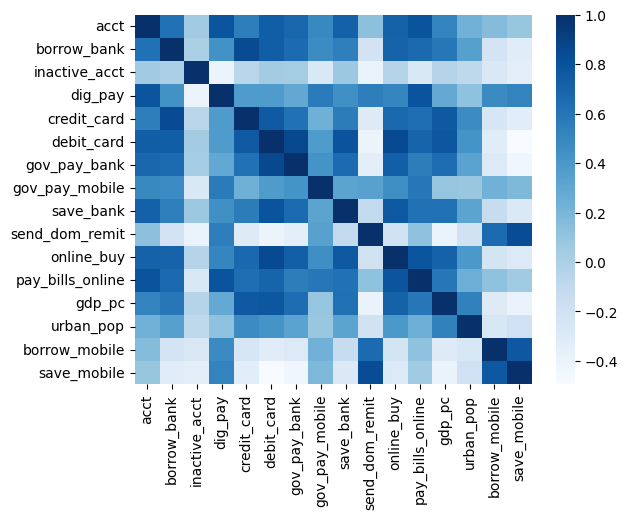

In [1606]:
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

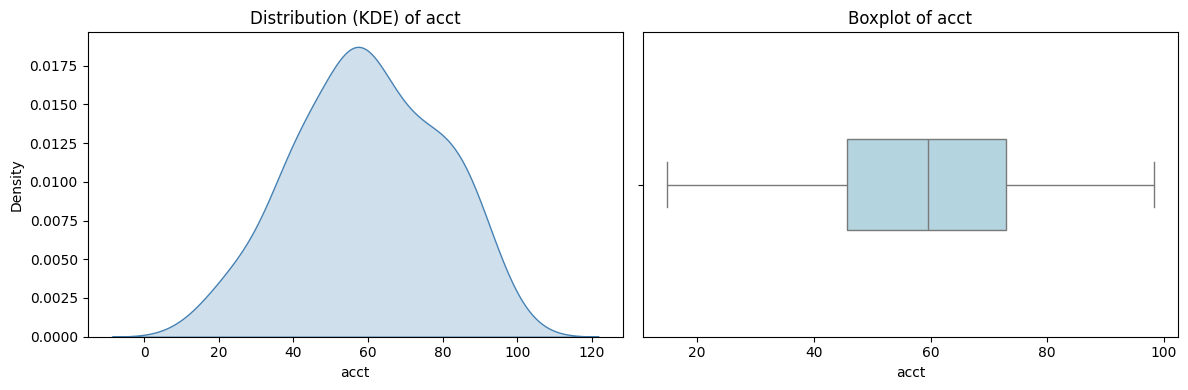

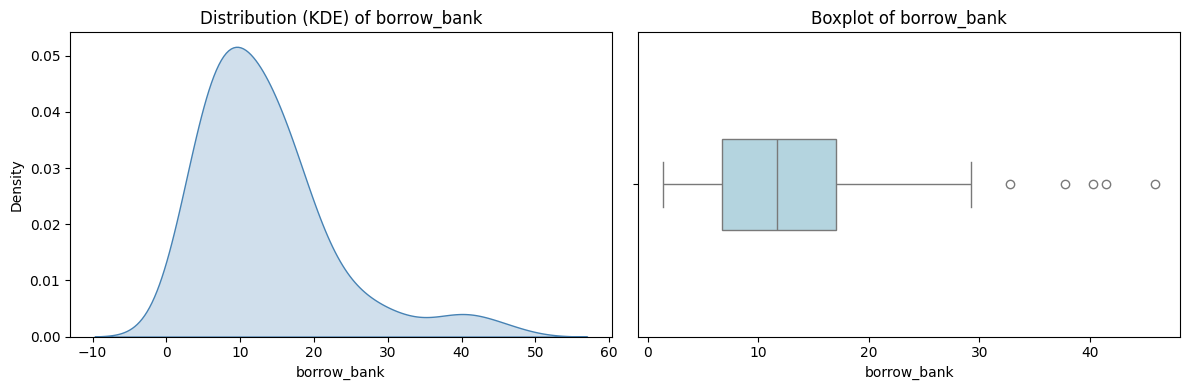

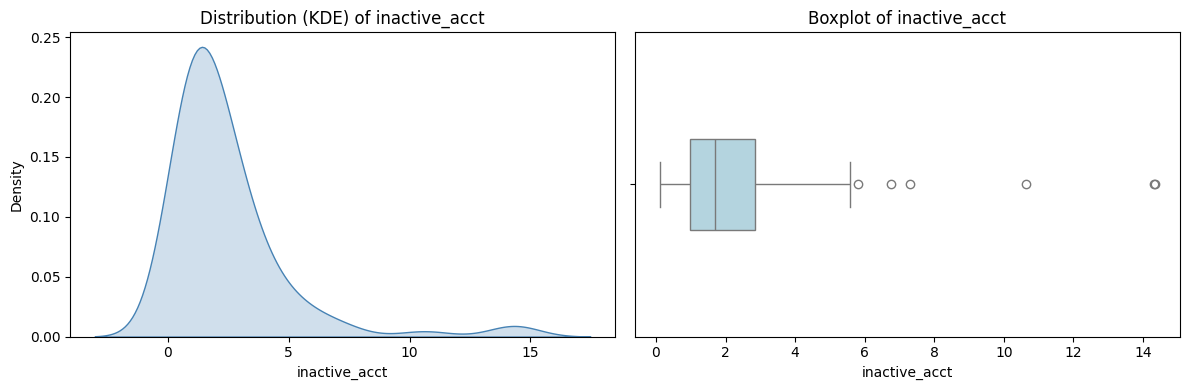

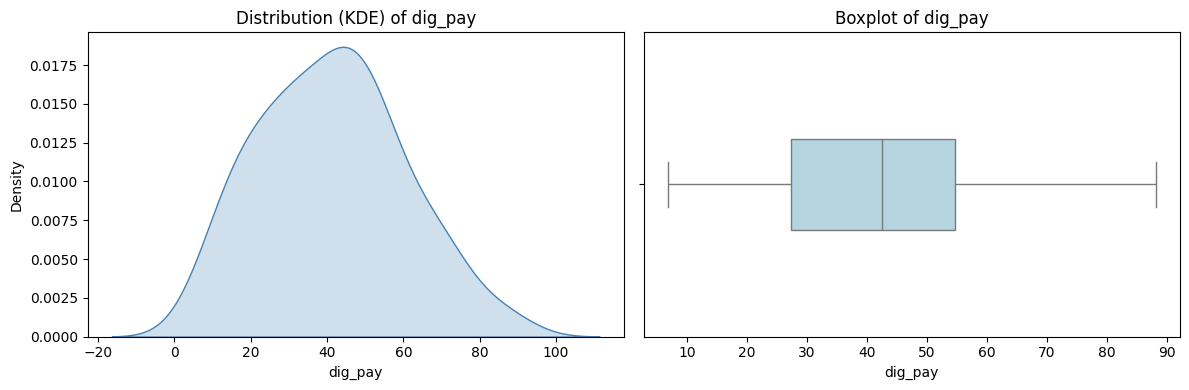

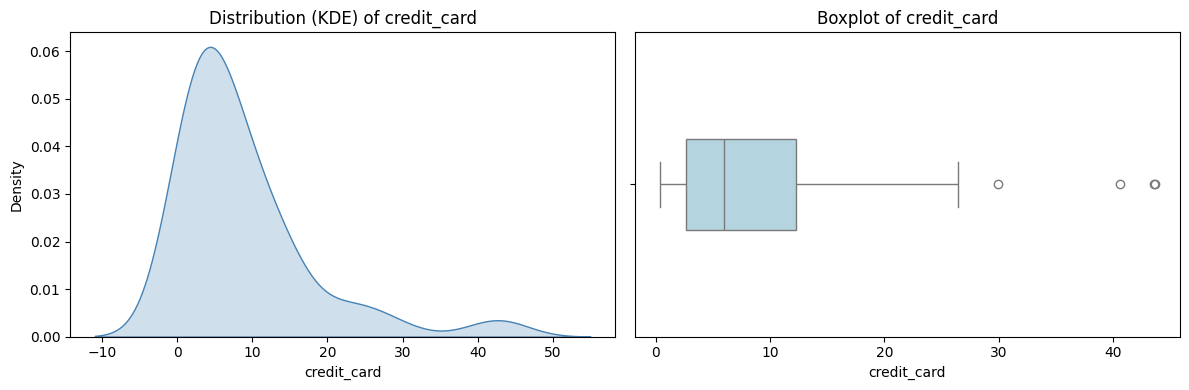

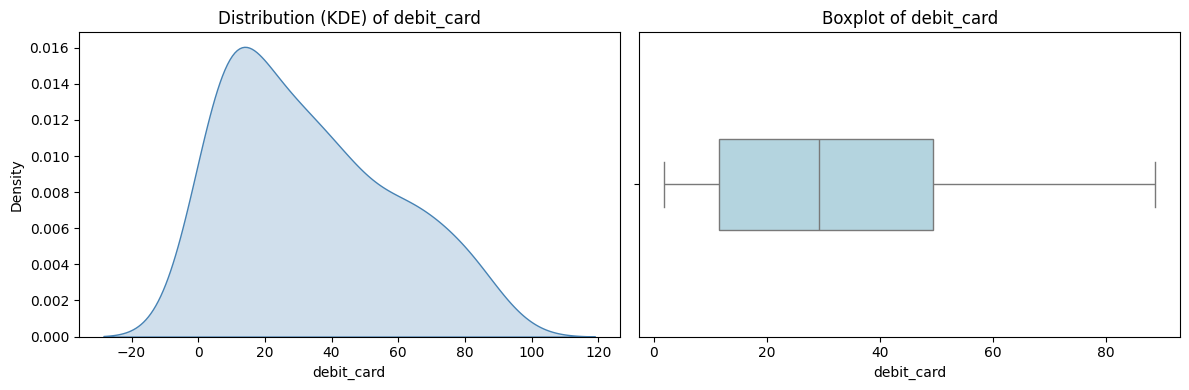

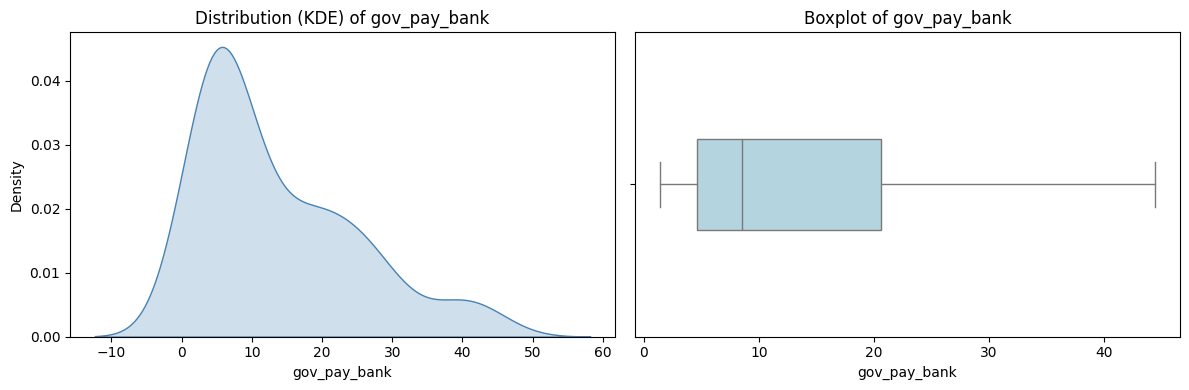

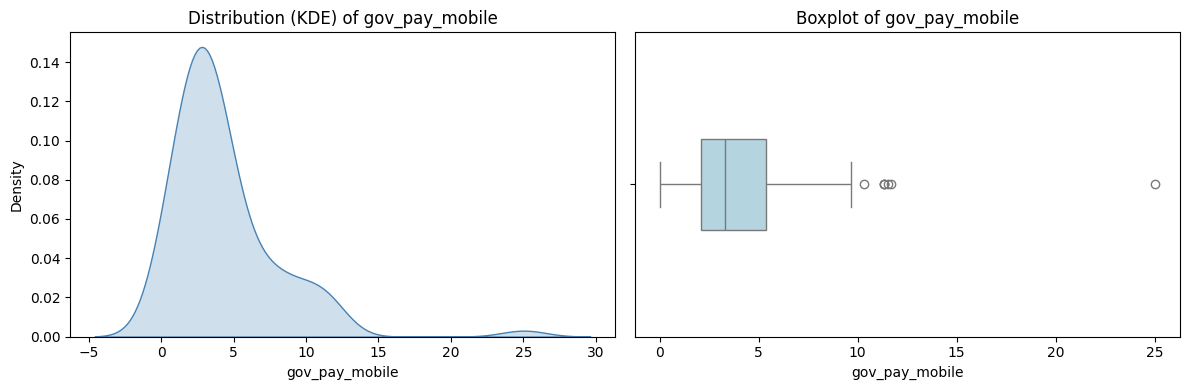

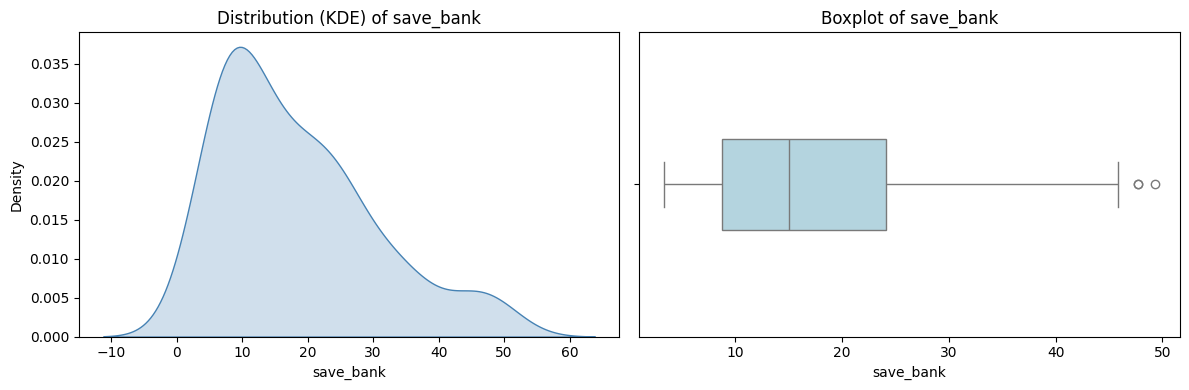

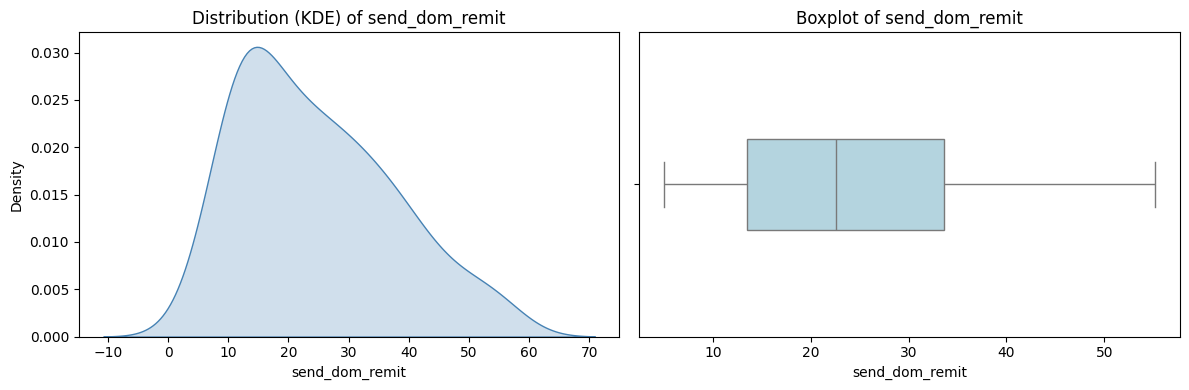

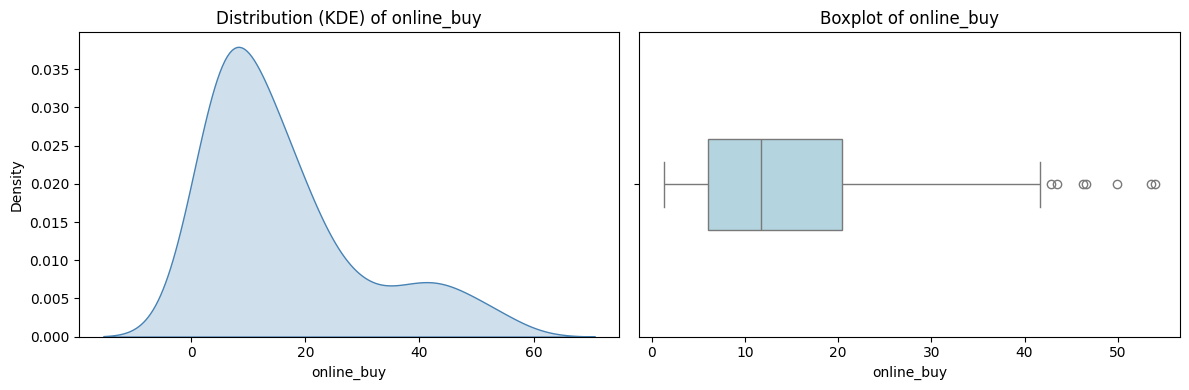

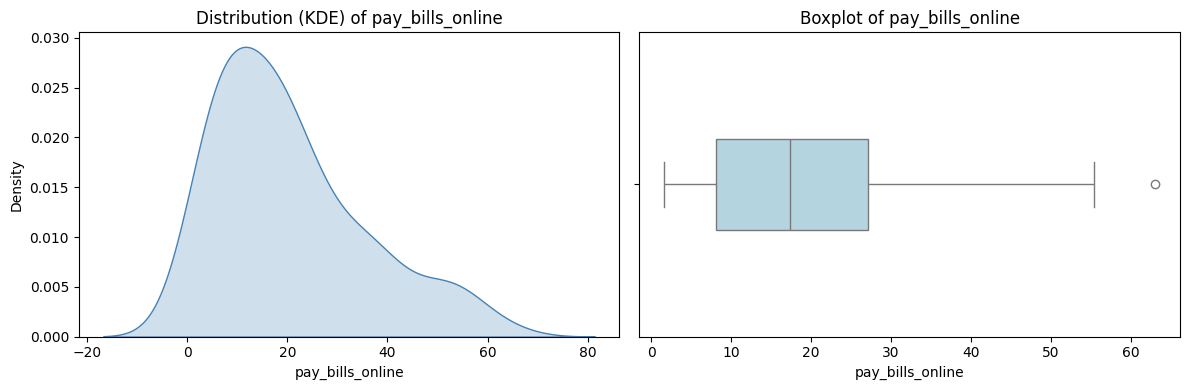

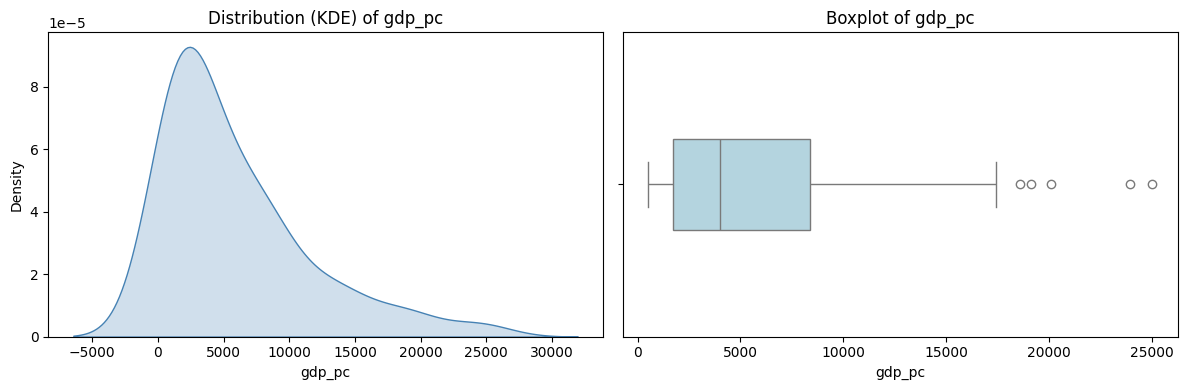

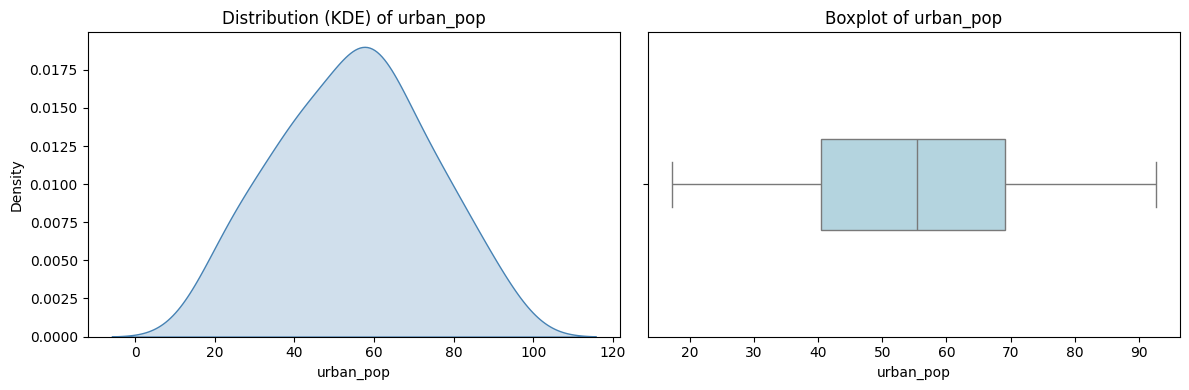

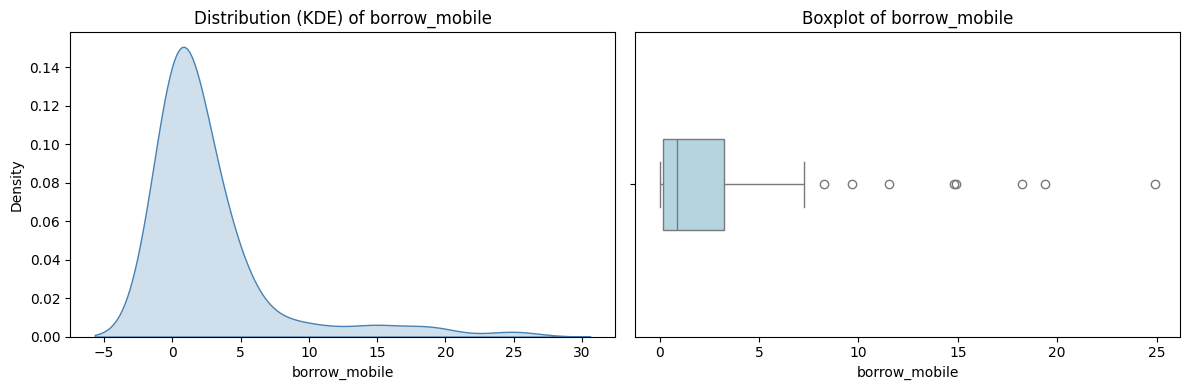

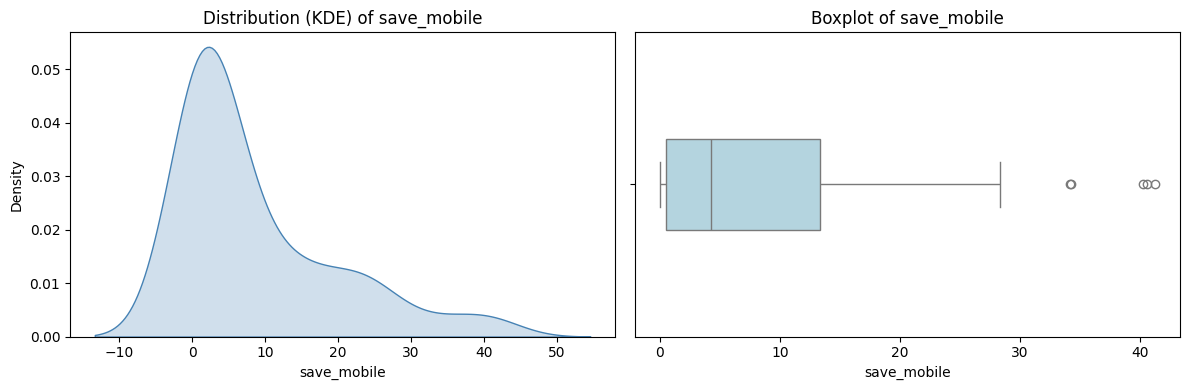

In [1607]:
for col in df.columns:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

    # KDE plot on the left
    sns.kdeplot(data=df, x=col, ax=axes[0], fill=True, color='steelblue')
    axes[0].set_title(f'Distribution (KDE) of {col}')

    # Boxplot on the right
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightblue', width=0.3)
    axes[1].set_title(f'Boxplot of {col}')

    # Layout and display
    plt.tight_layout()
    plt.show()


In [1608]:
df.columns

Index(['acct', 'borrow_bank', 'inactive_acct', 'dig_pay', 'credit_card',
       'debit_card', 'gov_pay_bank', 'gov_pay_mobile', 'save_bank',
       'send_dom_remit', 'online_buy', 'pay_bills_online', 'gdp_pc',
       'urban_pop', 'borrow_mobile', 'save_mobile'],
      dtype='object')

In [1609]:
scaler = StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

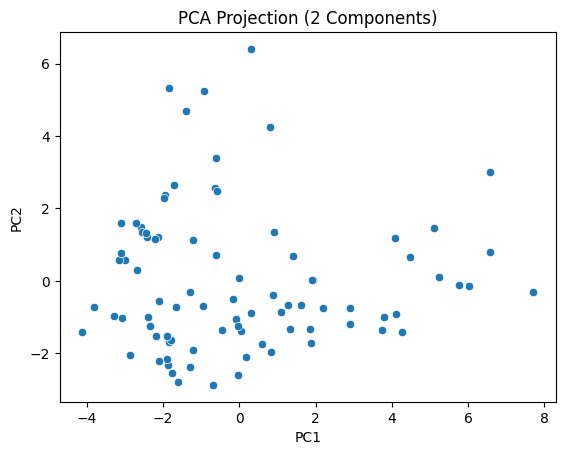

In [1610]:
pca=PCA(n_components=2)
pca_comp=pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_comp, columns=['PC1', 'PC2'], index=df_scaled.index)
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA Projection (2 Components)')
plt.show()

In [1611]:
pd.DataFrame(pca.components_*100,columns=df.columns)

,acct,borrow_bank,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop,borrow_mobile,save_mobile
0,29.681478,30.67357,-1.622329,20.292505,30.605174,34.590434,30.793498,17.699936,29.626343,-8.591465,33.289327,30.320540,29.598429,17.491774,-7.956582,-12.026550
1,18.884557,-1.61326,-25.823617,40.449399,-6.292228,-9.326906,-8.205061,26.626084,0.606308,45.396997,0.742339,21.135681,-11.648796,-9.117740,41.396882,44.652554


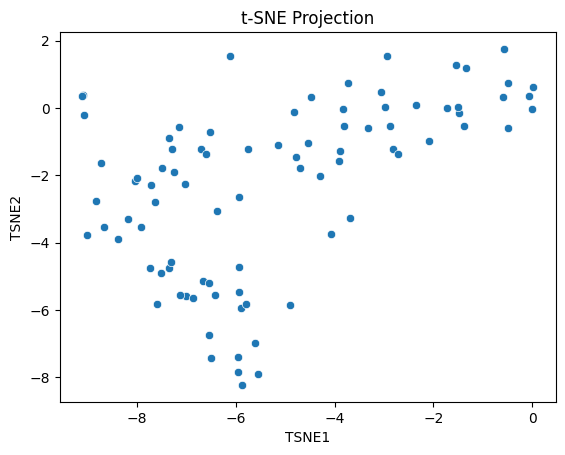

In [1612]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'], index=df_scaled.index)

sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2')
plt.title('t-SNE Projection')
plt.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


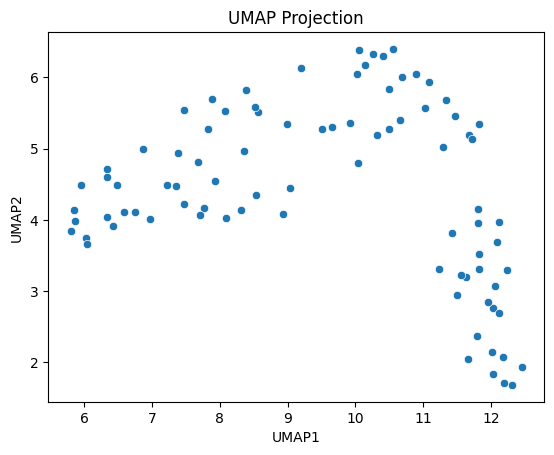

In [1613]:
import umap.umap_ as umap  # You may need to install with `pip install umap-learn`

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_results = umap_model.fit_transform(df_scaled)

umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'], index=df_scaled.index)

sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2')
plt.title('UMAP Projection')
plt.show()

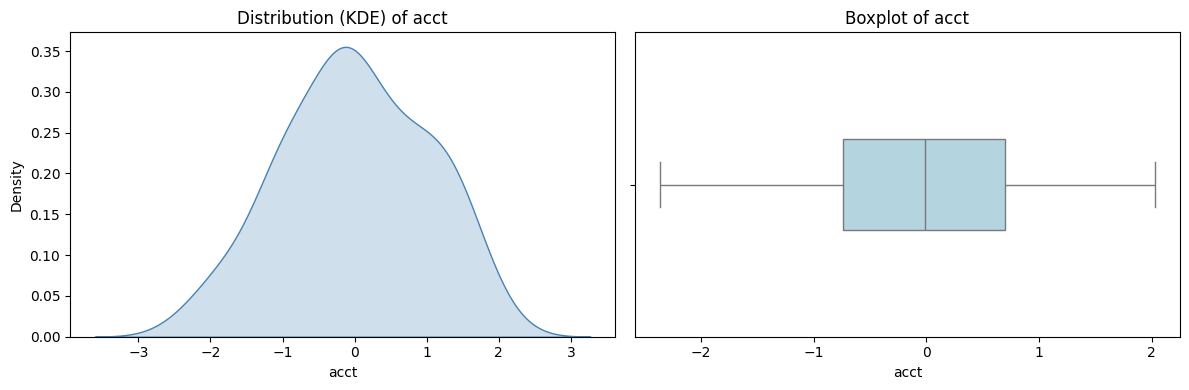

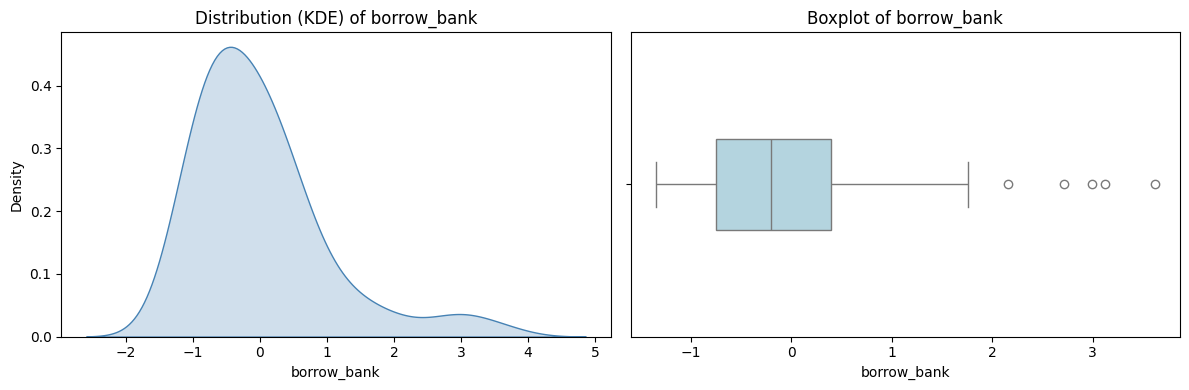

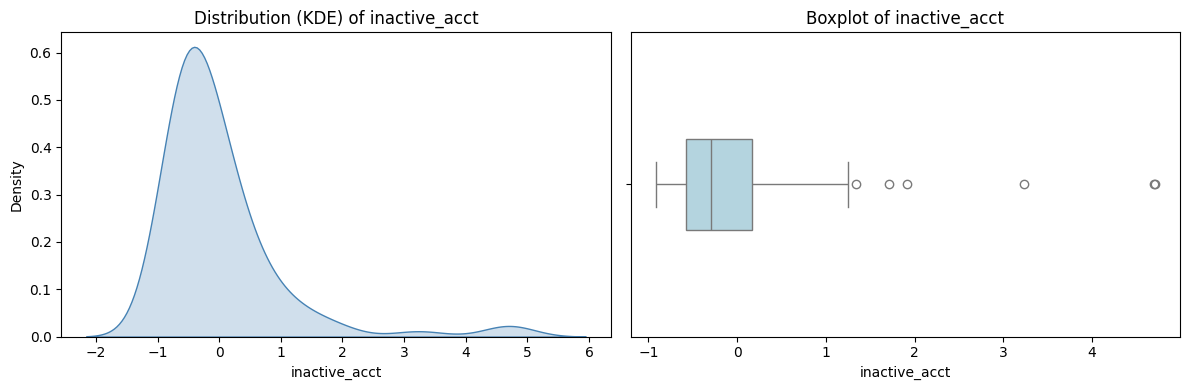

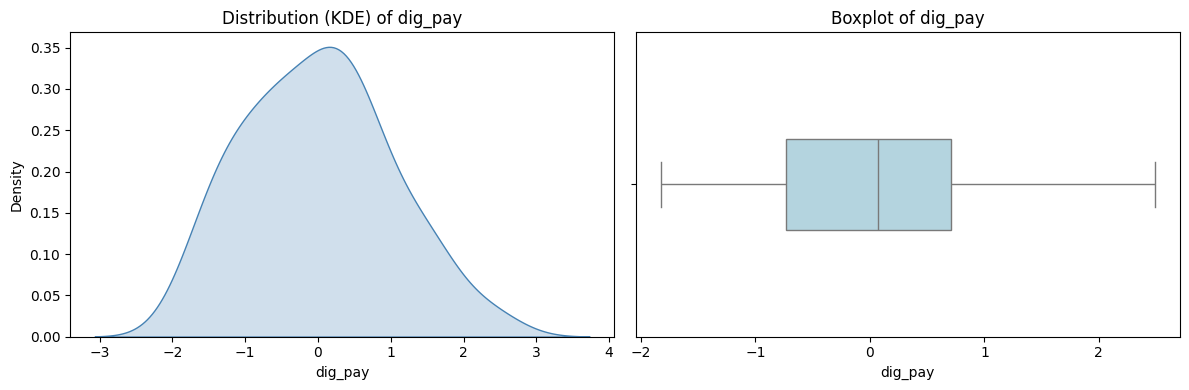

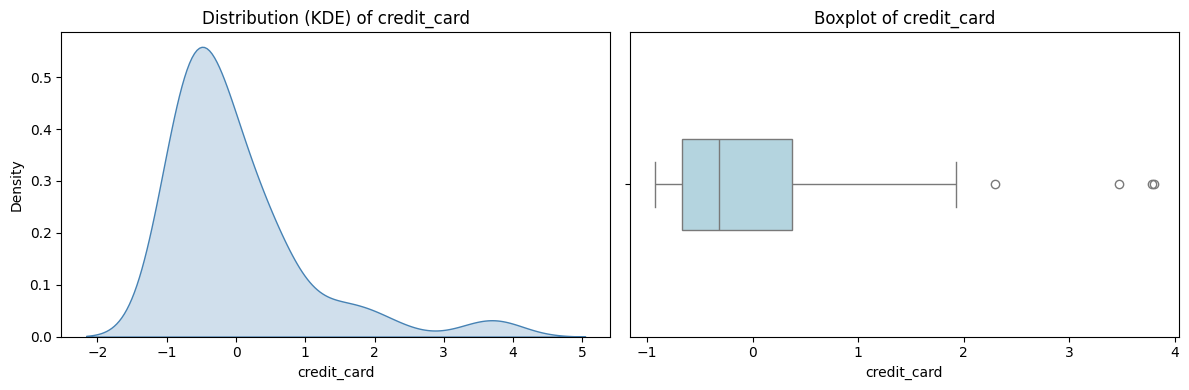

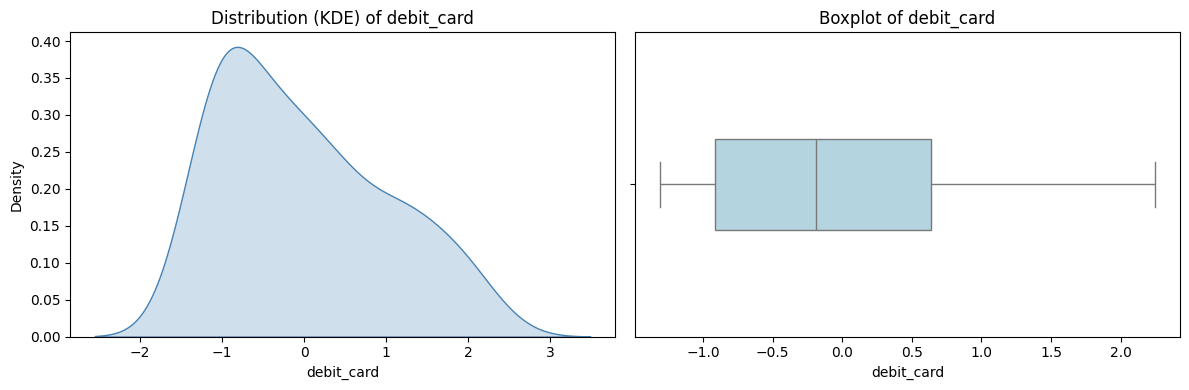

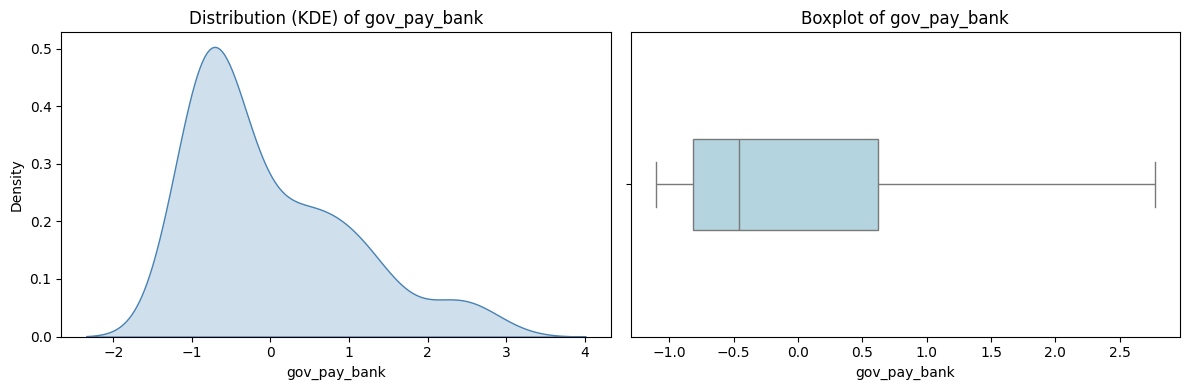

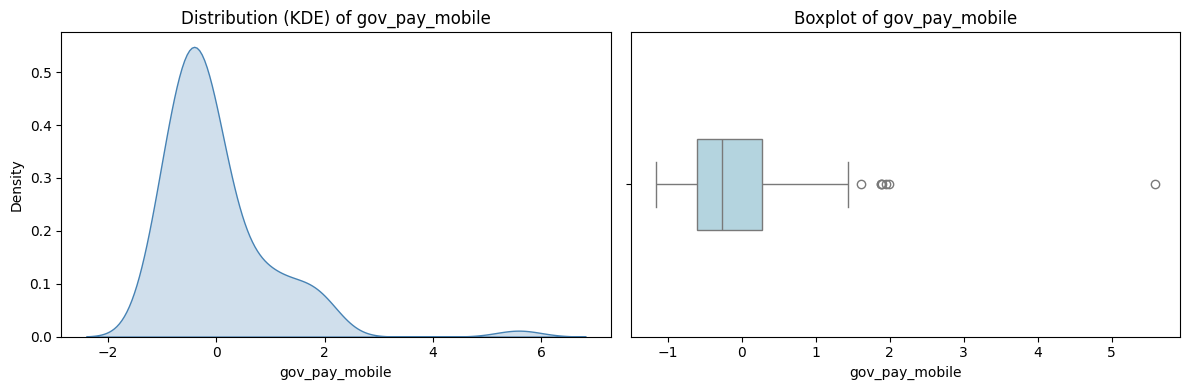

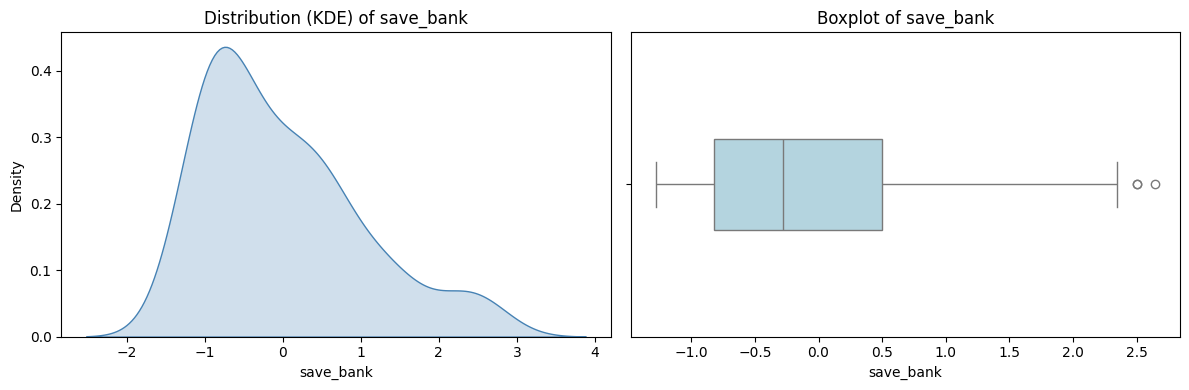

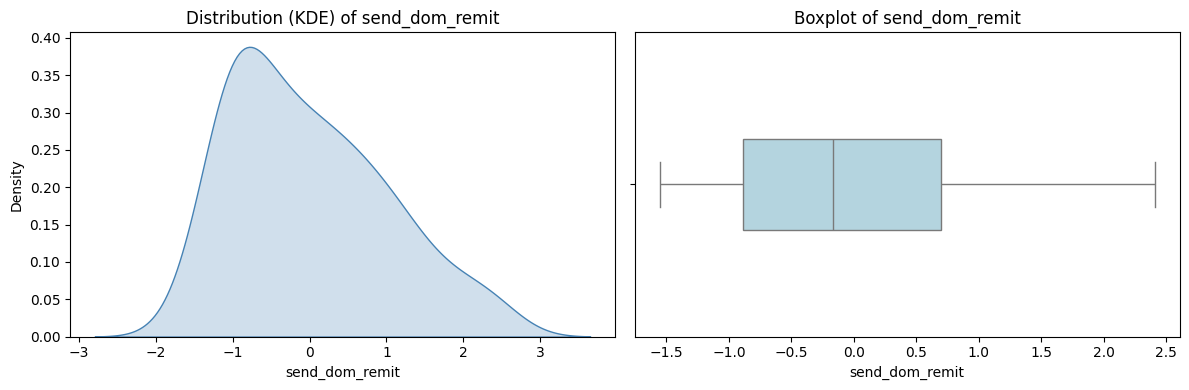

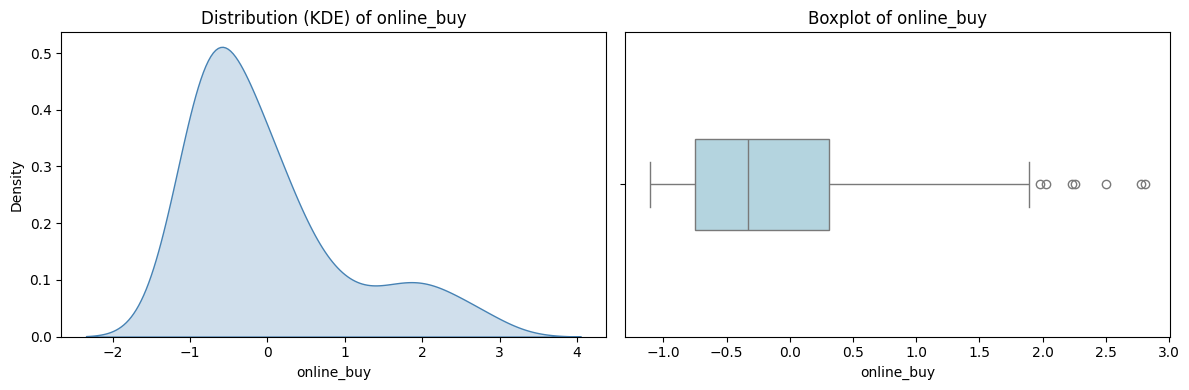

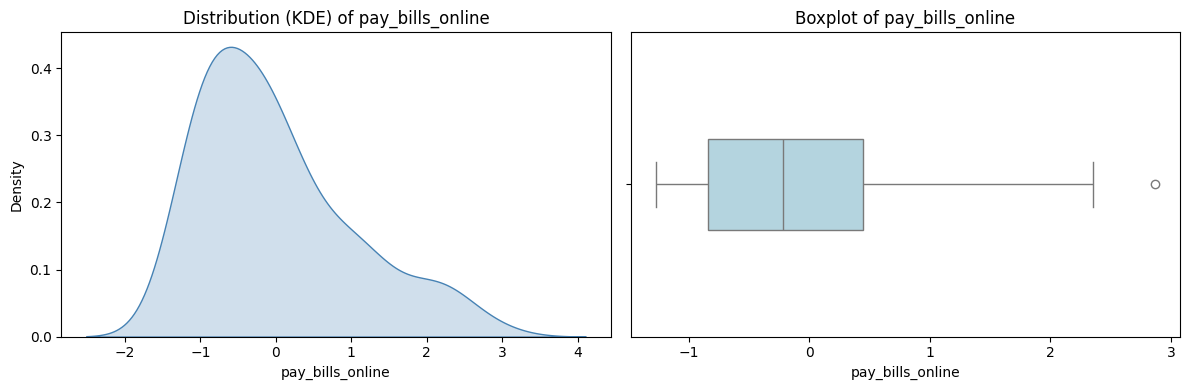

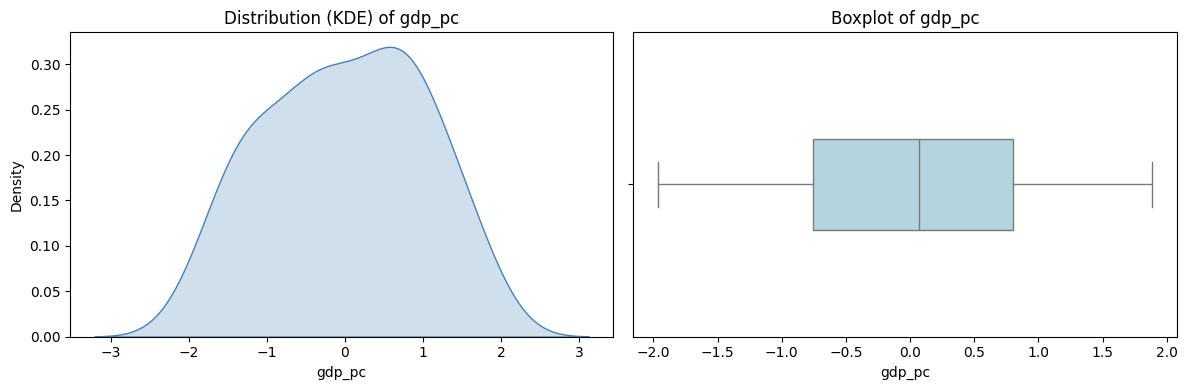

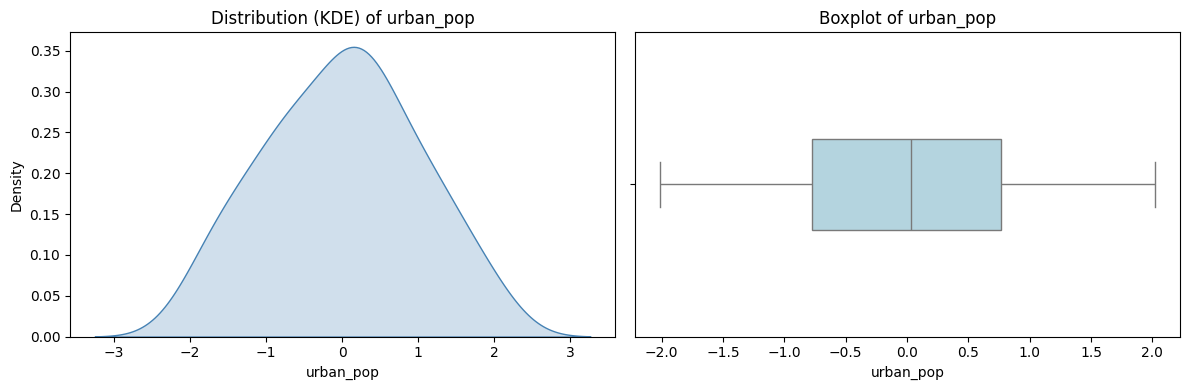

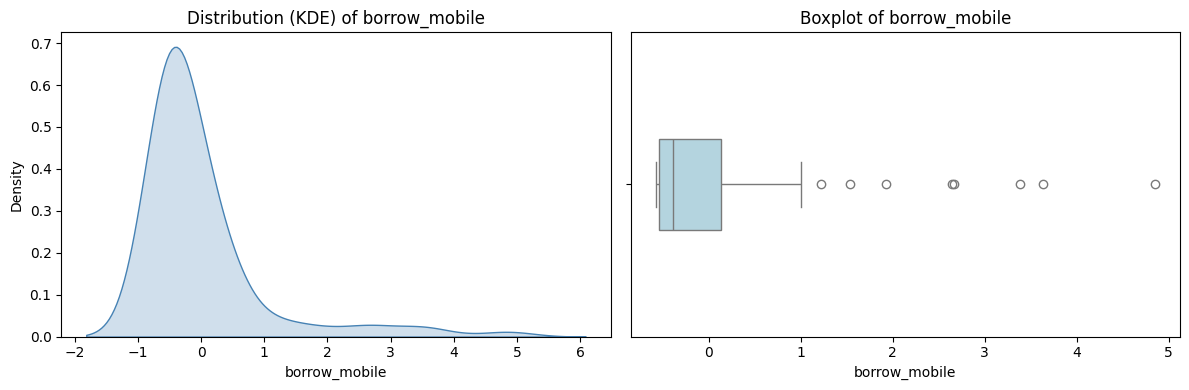

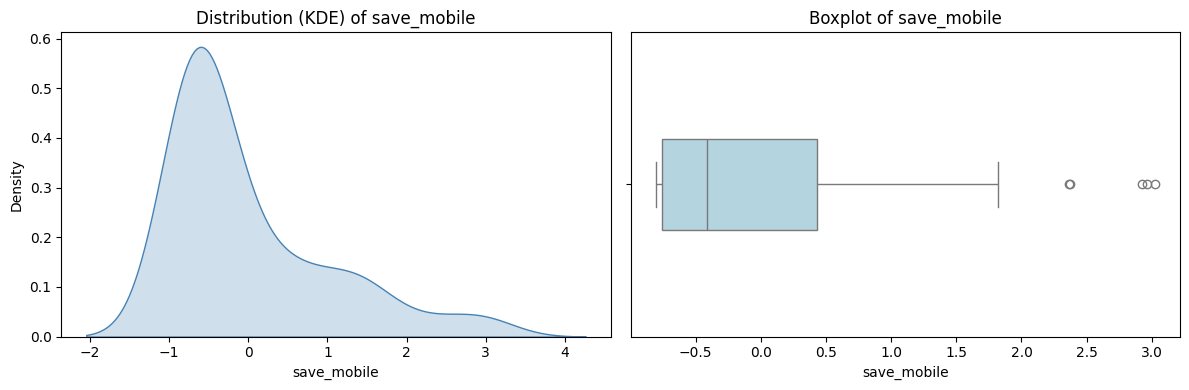

In [1614]:
df_change=df.copy()
df_change['gdp_pc']=np.log(df_change['gdp_pc'])

scaler = StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_change),columns=df_change.columns)

for col in df_scaled.columns:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

    # KDE plot on the left
    sns.kdeplot(data=df_scaled, x=col, ax=axes[0], fill=True, color='steelblue')
    axes[0].set_title(f'Distribution (KDE) of {col}')

    # Boxplot on the right
    sns.boxplot(data=df_scaled, x=col, ax=axes[1], color='lightblue', width=0.3)
    axes[1].set_title(f'Boxplot of {col}')

    # Layout and display
    plt.tight_layout()
    plt.show()


In [1615]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random

def hopkins(X, sampling_size=0.1):
    if isinstance(X, pd.DataFrame):
        X = X.values
    n, d = X.shape
    m = int(sampling_size * n)

    # random sample from original data
    rand_index = random.sample(range(0, n), m)
    X_sample = X[rand_index]

    # uniform random points in the same range as data
    X_min, X_max = np.min(X, axis=0), np.max(X, axis=0)
    X_uniform = np.random.uniform(X_min, X_max, (m, d))

    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    u_dist, _ = nbrs.kneighbors(X_uniform)
    x_dist, _ = nbrs.kneighbors(X_sample)

    u_sum = np.sum(u_dist[:, 0])
    x_sum = np.sum(x_dist[:, 1])  # 2nd neighbor to avoid self-match

    H = u_sum / (u_sum + x_sum)
    return round(H, 3)

# Example usage
hopkins_score = hopkins(df_scaled)
print(f"Hopkins Statistic: {hopkins_score}")

Hopkins Statistic: 0.793


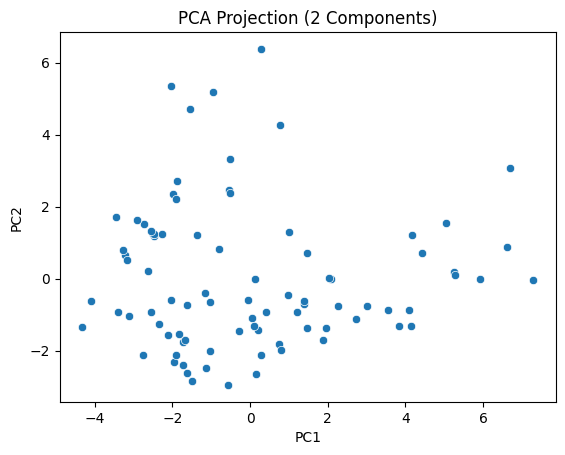

In [1616]:
pca=PCA(n_components=2)
pca_comp=pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_comp, columns=['PC1', 'PC2'], index=df_scaled.index)
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA Projection (2 Components)')
plt.show()

In [1617]:
pca.explained_variance_ratio_

array([0.46659366, 0.23906648])

#KMeans

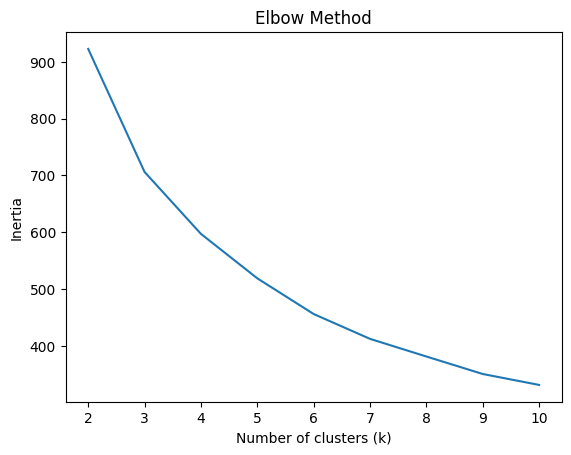

In [1618]:
inertias = []
silhouette_scores = []
dbi_scores = []
ch_scores=[]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.predict(df_scaled)

    inertias.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    dbi = davies_bouldin_score(df_scaled, labels)
    dbi_scores.append(dbi)
    ch = calinski_harabasz_score(df_scaled, labels)
    ch_scores.append(ch)


plt.plot(range(2,11), inertias)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.show()

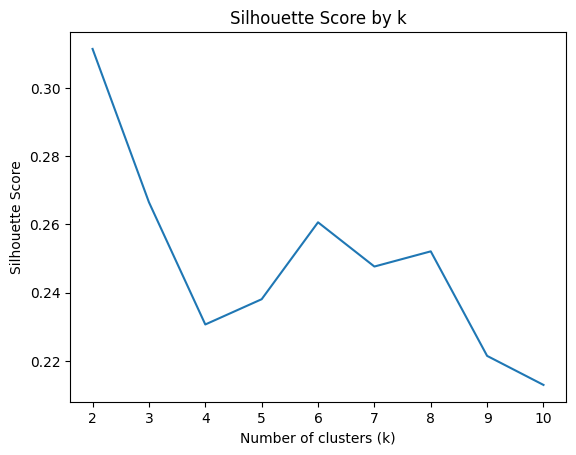

In [1619]:
plt.plot(range(2,11), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.show()

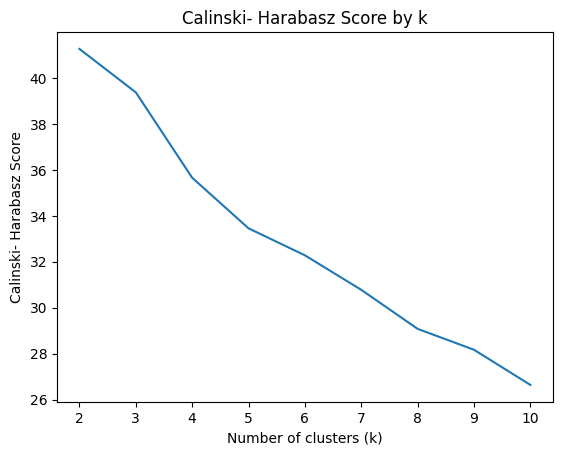

In [1620]:
plt.plot(range(2,11), ch_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski- Harabasz Score')
plt.title('Calinski- Harabasz Score by k')
plt.show()

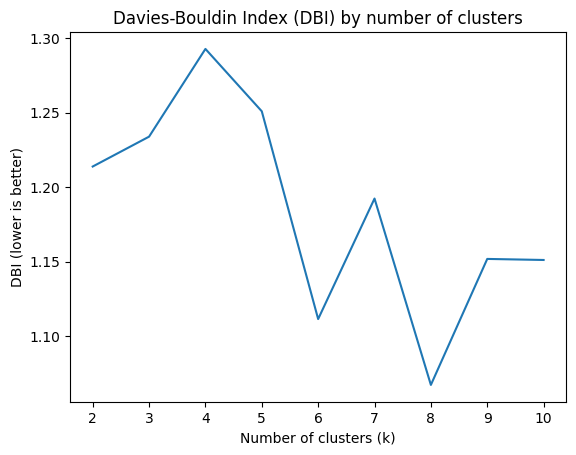

In [1621]:
plt.plot(range(2,11), dbi_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('DBI (lower is better)')
plt.title('Davies-Bouldin Index (DBI) by number of clusters')
plt.show()

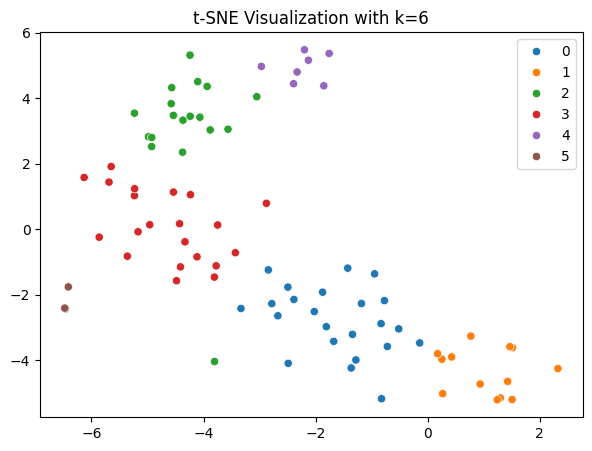

In [1622]:
def plot_tsne(k):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels, palette='tab10', legend='full')
    plt.title(f't-SNE Visualization with k={k}')
    plt.show()

plot_tsne(6)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


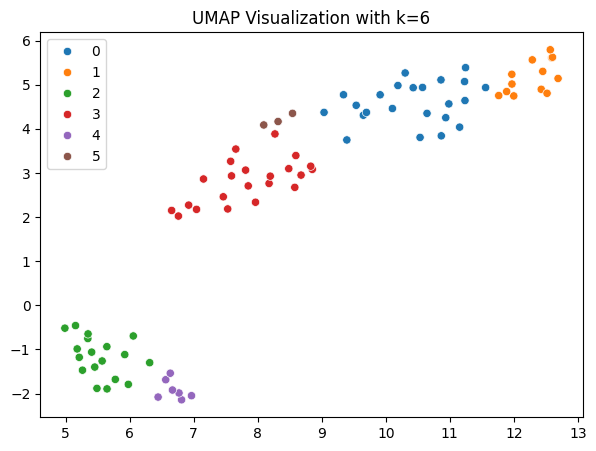

In [1623]:
def plot_umap(k):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    reducer = umap.UMAP(random_state=42)
    umap_results = reducer.fit_transform(df_scaled)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=umap_results[:,0], y=umap_results[:,1], hue=labels, palette='tab10', legend='full')
    plt.title(f'UMAP Visualization with k={k}')
    plt.show()

plot_umap(6)

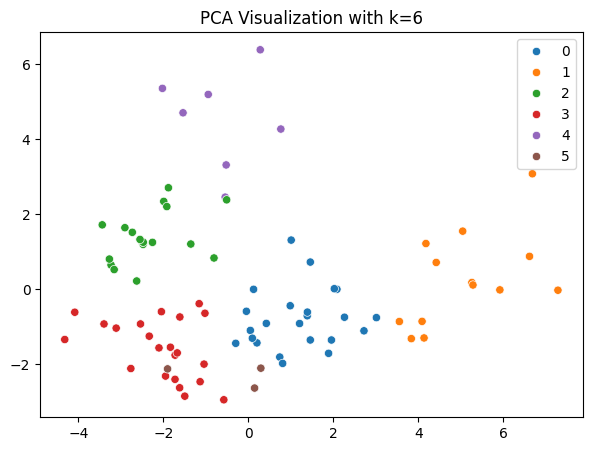

In [1624]:
def plot_pca(k):
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    reducer = PCA(n_components=2,random_state=42)
    pca_results = reducer.fit_transform(df_scaled)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=pca_results[:,0], y=pca_results[:,1], hue=labels, palette='tab10', legend='full')
    plt.title(f'PCA Visualization with k={k}')
    plt.show()

plot_pca(6)

In [1625]:
kmeans=KMeans(n_clusters=6,n_init=50,random_state=42)
df['km6']=kmeans.fit_predict(df_scaled)
df.head()

,acct,borrow_bank,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop,borrow_mobile,save_mobile,km6
Country_Name,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,4.489219,10.606868,7.357414,32.783771,18.063152,0.426838,14.758060,7.297490,12.575753,5.364910,10011.627986,65.380,0.000000,0.000000,3
Argentina,81.744245,29.268221,1.950963,65.415519,29.911506,64.068094,21.893278,6.570712,23.122916,19.960042,36.395602,43.917389,13858.203980,92.579,3.341521,12.678768,1
Armenia,71.373473,23.181125,2.086587,38.552387,7.687952,43.713116,23.514186,3.003107,9.117360,21.073499,22.952919,19.844688,8500.605225,63.929,0.178551,1.720468,0
Azerbaijan,56.304666,22.216869,1.253056,31.340120,13.381967,49.282930,29.788873,5.187581,16.961626,11.629979,12.116033,26.148469,7283.835630,57.997,0.000000,0.000000,0
Bangladesh,43.283973,12.723885,3.435720,28.133104,1.727212,7.668213,2.828269,3.325594,9.658462,9.921425,7.112083,6.560801,2593.416074,41.230,0.423525,0.961768,3


In [1626]:
gap_statistic_from_labels(df_scaled, df['km6'])

np.float64(1.9459176918594587)

#Hierarchical

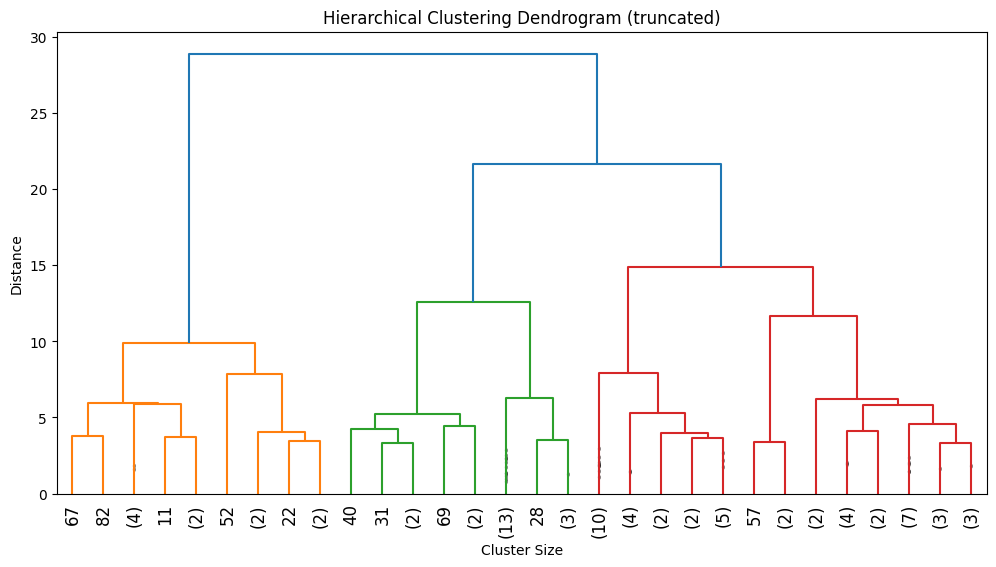

In [1627]:
Z = linkage(df_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

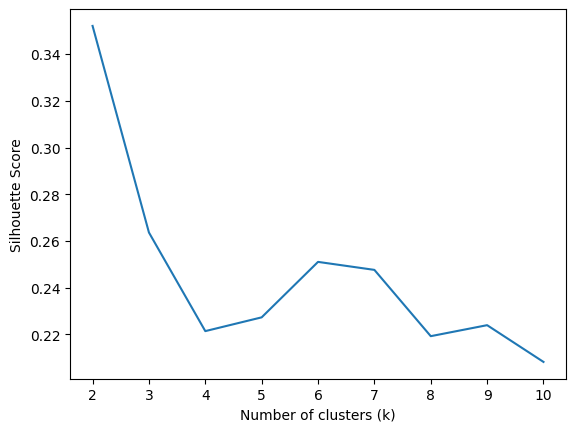

In [1628]:
sil_scores = []
dbi_scores = []
ch_scores=[]
for k in range(2,11):
  labels=fcluster(Z, k, criterion='maxclust')
  sil_score=silhouette_score(df_scaled,labels)
  sil_scores.append(sil_score)
  dbi = davies_bouldin_score(df_scaled, labels)
  dbi_scores.append(dbi)
  ch = calinski_harabasz_score(df_scaled, labels)
  ch_scores.append(ch)

plt.plot(range(2,11),sil_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

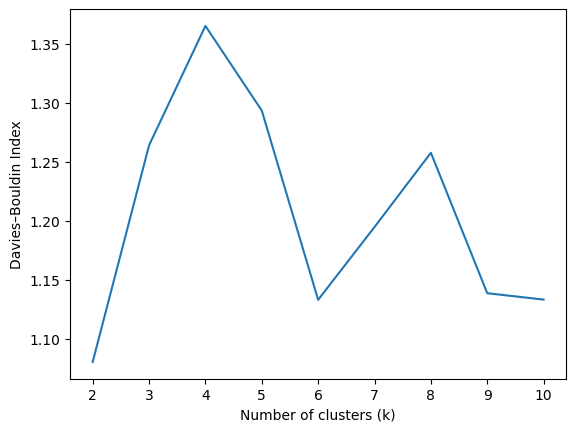

In [1629]:
plt.plot(range(2,11),dbi_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies–Bouldin Index')
plt.show()

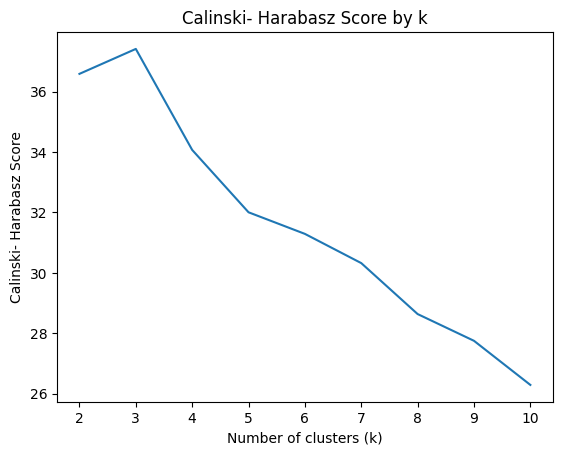

In [1630]:
plt.plot(range(2,11), ch_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski- Harabasz Score')
plt.title('Calinski- Harabasz Score by k')
plt.show()

In [1631]:
df['hc_cluster5'] = fcluster(Z, 5, criterion='maxclust')
df['hc_cluster6'] = fcluster(Z, 6, criterion='maxclust')

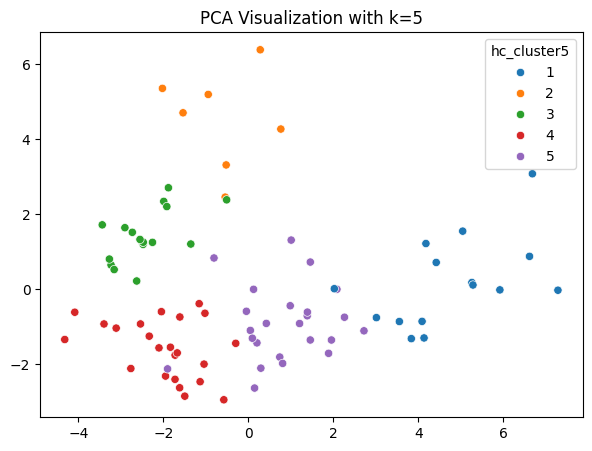

In [1632]:
def plot_pca():

    reducer = PCA(n_components=2,random_state=42)
    pca_results = reducer.fit_transform(df_scaled)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=pca_results[:,0], y=pca_results[:,1], hue=df['hc_cluster5'], palette='tab10', legend='full')
    plt.title(f'PCA Visualization with k=5')
    plt.show()

plot_pca()

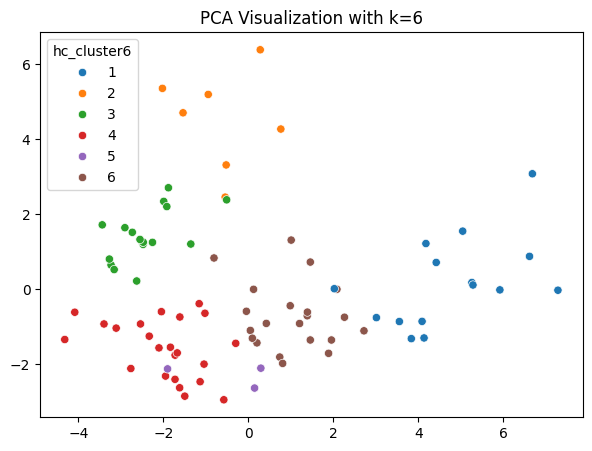

In [1633]:
def plot_pca():

    reducer = PCA(n_components=2,random_state=42)
    pca_results = reducer.fit_transform(df_scaled)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=pca_results[:,0], y=pca_results[:,1], hue=df['hc_cluster6'], palette='tab10', legend='full')
    plt.title(f'PCA Visualization with k=6')
    plt.show()

plot_pca()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


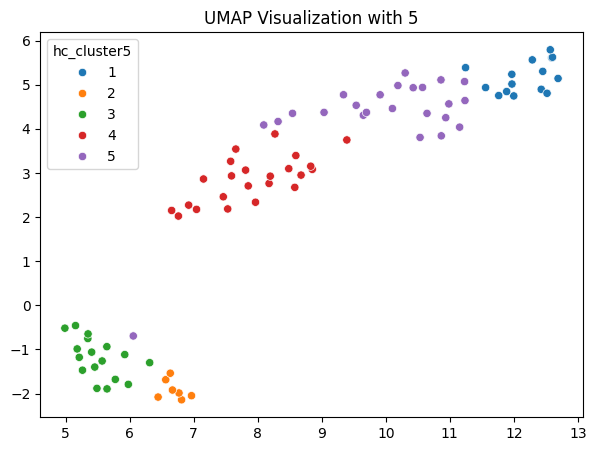

In [1634]:
reducer = umap.UMAP(random_state=42)
umap_results = reducer.fit_transform(df_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=umap_results[:,0], y=umap_results[:,1], hue=df['hc_cluster5'], palette='tab10', legend='full')
plt.title(f'UMAP Visualization with 5')
plt.show()

In [1635]:
gap_statistic_from_labels(df_scaled, df['hc_cluster5'])

np.float64(0.6214755425794563)

#Affinty Propagation

In [1636]:
ap = AffinityPropagation(random_state=42, affinity='euclidean')  # default damping=0.5
ap.fit(df_scaled)

# Extract labels
ap_labels = ap.labels_
n_clusters_ap = len(set(ap_labels))

print(f"Number of clusters found by Affinity Propagation: {n_clusters_ap}")
score = silhouette_score(df_scaled, ap_labels)
print(f"Silhouette Score: {score:.3f}")

Number of clusters found by Affinity Propagation: 11
Silhouette Score: 0.220


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


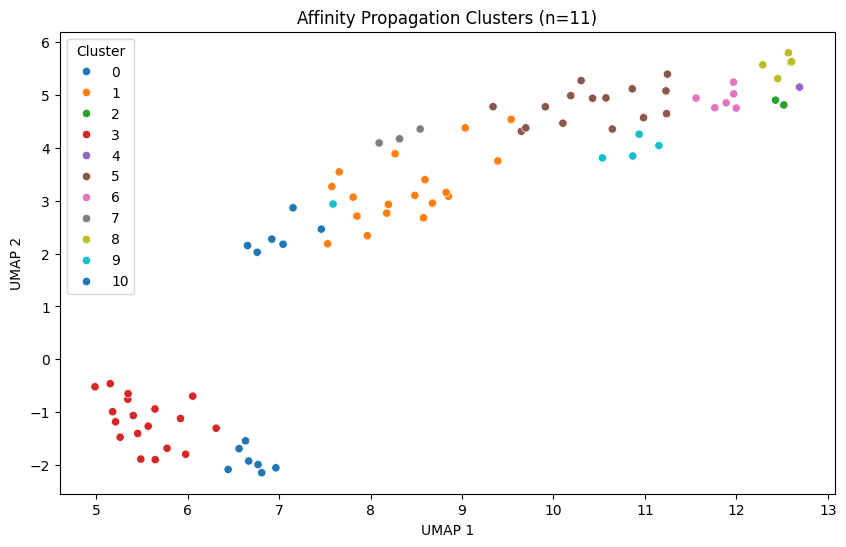

In [1637]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=ap_labels, palette='tab10')
plt.title(f'Affinity Propagation Clusters (n={n_clusters_ap})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.show()

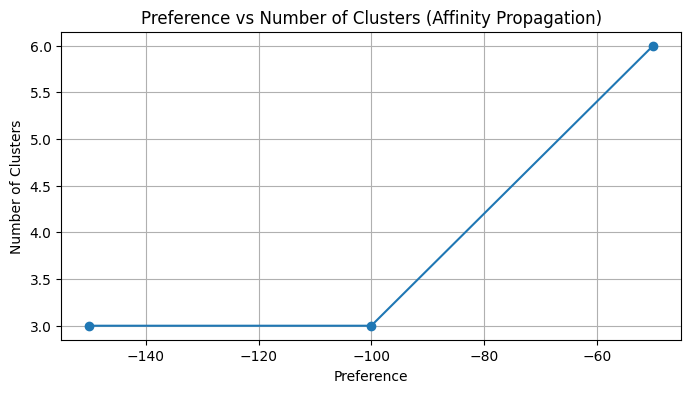

In [1638]:
preferences = [-150,-100, -50]
cluster_counts = []

for pref in preferences:
    ap_temp = AffinityPropagation(preference=pref, random_state=42)
    ap_temp.fit(df_scaled)
    cluster_counts.append(len(set(ap_temp.labels_)))

plt.figure(figsize=(8, 4))
plt.plot(preferences, cluster_counts, marker='o')
plt.title("Preference vs Number of Clusters (Affinity Propagation)")
plt.xlabel("Preference")
plt.ylabel("Number of Clusters")
plt.grid()
plt.show()


In [1639]:
ap = AffinityPropagation(random_state=42, affinity='euclidean',preference=-60)
ap.fit(df_scaled)

# Extract labels
ap_labels = ap.labels_
n_clusters_ap = len(set(ap_labels))

print(f"Number of clusters found by Affinity Propagation: {n_clusters_ap}")
score = silhouette_score(df_scaled, ap_labels)
print(f"Silhouette Score: {score:.3f}")
df['ap_labels6']=ap.labels_
print('DB index',davies_bouldin_score(df_scaled, ap_labels))

Number of clusters found by Affinity Propagation: 6
Silhouette Score: 0.254
DB index 1.1309626403751099


In [1640]:
#Chosen value for Affinty Propogation
gap_statistic_from_labels(df_scaled, df['ap_labels6'])

np.float64(1.9129896329323155)

In [1641]:
ap = AffinityPropagation(random_state=42, affinity='euclidean',preference=-80)
ap.fit(df_scaled)

# Extract labels
ap_labels = ap.labels_
n_clusters_ap = len(set(ap_labels))

print(f"Number of clusters found by Affinity Propagation: {n_clusters_ap}")
score = silhouette_score(df_scaled, ap_labels)
print(f"Silhouette Score: {score:.3f}")
df['ap_labels5']=ap.labels_
print('DB index',davies_bouldin_score(df_scaled, ap_labels))

Number of clusters found by Affinity Propagation: 5
Silhouette Score: 0.229
DB index 1.2460646117884475


In [1642]:
gap_statistic_from_labels(df_scaled, df['ap_labels5'])

np.float64(1.814988873867295)

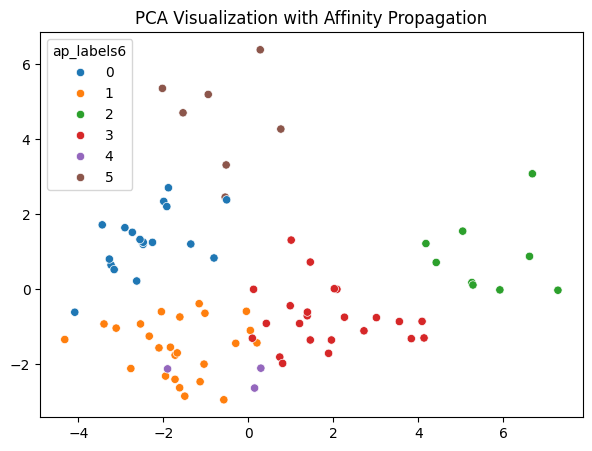

In [1643]:
def plot_pca():

    reducer = PCA(n_components=2,random_state=42)
    pca_results = reducer.fit_transform(df_scaled)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=pca_results[:,0], y=pca_results[:,1], hue=df['ap_labels6'], palette='tab10', legend='full')
    plt.title(f'PCA Visualization with Affinity Propagation')
    plt.show()

plot_pca()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


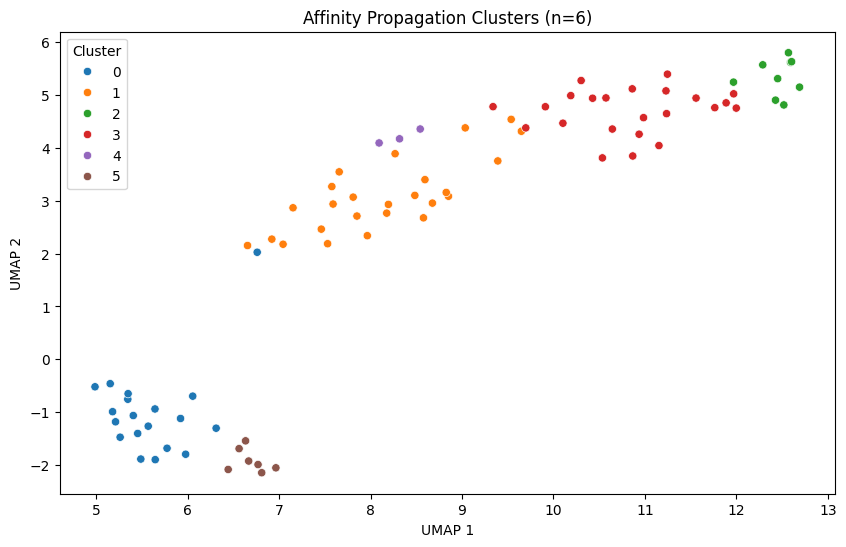

In [1644]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['ap_labels6'], palette='tab10')
plt.title(f'Affinity Propagation Clusters (n=6)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.show()

#Analysis of clusters

In [1645]:
df.head()

,acct,borrow_bank,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,send_dom_remit,...,pay_bills_online,gdp_pc,urban_pop,borrow_mobile,save_mobile,km6,hc_cluster5,hc_cluster6,ap_labels6,ap_labels5
Country_Name,,,,,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,4.489219,10.606868,7.357414,32.783771,18.063152,0.426838,14.758060,7.297490,...,5.364910,10011.627986,65.380,0.000000,0.000000,3,4,4,1,1
Argentina,81.744245,29.268221,1.950963,65.415519,29.911506,64.068094,21.893278,6.570712,23.122916,19.960042,...,43.917389,13858.203980,92.579,3.341521,12.678768,1,1,1,2,2
Armenia,71.373473,23.181125,2.086587,38.552387,7.687952,43.713116,23.514186,3.003107,9.117360,21.073499,...,19.844688,8500.605225,63.929,0.178551,1.720468,0,5,6,3,3
Azerbaijan,56.304666,22.216869,1.253056,31.340120,13.381967,49.282930,29.788873,5.187581,16.961626,11.629979,...,26.148469,7283.835630,57.997,0.000000,0.000000,0,5,6,3,3
Bangladesh,43.283973,12.723885,3.435720,28.133104,1.727212,7.668213,2.828269,3.325594,9.658462,9.921425,...,6.560801,2593.416074,41.230,0.423525,0.961768,3,4,4,1,1


In [1646]:
df.columns

Index(['acct', 'borrow_bank', 'inactive_acct', 'dig_pay', 'credit_card',
       'debit_card', 'gov_pay_bank', 'gov_pay_mobile', 'save_bank',
       'send_dom_remit', 'online_buy', 'pay_bills_online', 'gdp_pc',
       'urban_pop', 'borrow_mobile', 'save_mobile', 'km6', 'hc_cluster5',
       'hc_cluster6', 'ap_labels6', 'ap_labels5'],
      dtype='object')

##KMeans

In [1647]:
df_main=df[['acct', 'borrow_bank', 'borrow_mobile', 'inactive_acct', 'dig_pay', 'credit_card',
       'debit_card', 'gov_pay_bank', 'gov_pay_mobile', 'save_bank', 'save_mobile',
       'send_dom_remit', 'online_buy', 'pay_bills_online', 'gdp_pc',
       'urban_pop', 'km6']]
df_main.head()

,acct,borrow_bank,borrow_mobile,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,save_mobile,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop,km6
Country_Name,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,0.000000,4.489219,10.606868,7.357414,32.783771,18.063152,0.426838,14.758060,0.000000,7.297490,12.575753,5.364910,10011.627986,65.380,3
Argentina,81.744245,29.268221,3.341521,1.950963,65.415519,29.911506,64.068094,21.893278,6.570712,23.122916,12.678768,19.960042,36.395602,43.917389,13858.203980,92.579,1
Armenia,71.373473,23.181125,0.178551,2.086587,38.552387,7.687952,43.713116,23.514186,3.003107,9.117360,1.720468,21.073499,22.952919,19.844688,8500.605225,63.929,0
Azerbaijan,56.304666,22.216869,0.000000,1.253056,31.340120,13.381967,49.282930,29.788873,5.187581,16.961626,0.000000,11.629979,12.116033,26.148469,7283.835630,57.997,0
Bangladesh,43.283973,12.723885,0.423525,3.435720,28.133104,1.727212,7.668213,2.828269,3.325594,9.658462,0.961768,9.921425,7.112083,6.560801,2593.416074,41.230,3


In [1648]:
df_main.groupby(by='km6').mean()

,acct,borrow_bank,borrow_mobile,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,save_mobile,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop
km6,,,,,,,,,,,,,,,,
0,64.960278,16.217098,0.865984,2.588114,39.829010,11.342667,47.562941,17.686410,4.196568,21.756689,2.833105,19.095957,18.753218,22.919109,8252.538805,64.362826
1,85.990130,27.761512,0.597804,1.545110,62.298042,24.324907,75.100843,32.112526,7.883673,35.869831,3.085924,19.829462,42.081104,43.744536,14522.594444,68.314615
2,53.482268,6.158742,4.041247,1.215842,47.087153,2.538960,10.966822,4.365041,3.442929,10.114752,18.966598,37.787618,5.798397,13.754530,1701.999515,47.244389
3,36.903095,8.669802,0.841676,2.882472,19.094560,4.045810,17.997227,7.644577,2.237230,10.768019,3.026612,16.910056,8.673383,7.244086,3162.670707,50.190227
4,74.272595,10.658457,15.545988,0.741411,68.578091,4.941453,21.236991,7.764748,8.350784,17.617482,32.958378,46.904858,12.262355,32.236271,2899.295521,44.684143
5,76.902689,16.226610,0.391995,13.098912,24.883177,4.384666,32.467913,16.492577,1.021632,22.461548,1.214824,14.992830,10.712355,11.636811,2886.513939,26.216333


##Hierarchical

In [1649]:
df_main=df[['acct', 'borrow_bank', 'borrow_mobile', 'inactive_acct', 'dig_pay', 'credit_card',
       'debit_card', 'gov_pay_bank', 'gov_pay_mobile', 'save_bank', 'save_mobile',
       'send_dom_remit', 'online_buy', 'pay_bills_online', 'gdp_pc',
       'urban_pop', 'hc_cluster5']]
df_main.head()

,acct,borrow_bank,borrow_mobile,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,save_mobile,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop,hc_cluster5
Country_Name,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,0.000000,4.489219,10.606868,7.357414,32.783771,18.063152,0.426838,14.758060,0.000000,7.297490,12.575753,5.364910,10011.627986,65.380,4
Argentina,81.744245,29.268221,3.341521,1.950963,65.415519,29.911506,64.068094,21.893278,6.570712,23.122916,12.678768,19.960042,36.395602,43.917389,13858.203980,92.579,1
Armenia,71.373473,23.181125,0.178551,2.086587,38.552387,7.687952,43.713116,23.514186,3.003107,9.117360,1.720468,21.073499,22.952919,19.844688,8500.605225,63.929,5
Azerbaijan,56.304666,22.216869,0.000000,1.253056,31.340120,13.381967,49.282930,29.788873,5.187581,16.961626,0.000000,11.629979,12.116033,26.148469,7283.835630,57.997,5
Bangladesh,43.283973,12.723885,0.423525,3.435720,28.133104,1.727212,7.668213,2.828269,3.325594,9.658462,0.961768,9.921425,7.112083,6.560801,2593.416074,41.230,4


In [1650]:
df_main.groupby(by='hc_cluster5').mean()

,acct,borrow_bank,borrow_mobile,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,save_mobile,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop
hc_cluster5,,,,,,,,,,,,,,,,
1,84.483072,26.198553,0.547360,1.622624,60.930672,22.506776,73.705875,30.062179,7.304437,35.205910,2.768953,19.308222,41.348193,43.214243,13513.645448,65.963133
2,74.272595,10.658457,15.545988,0.741411,68.578091,4.941453,21.236991,7.764748,8.350784,17.617482,32.958378,46.904858,12.262355,32.236271,2899.295521,44.684143
3,52.907027,6.161324,4.102609,1.205181,47.276343,2.498527,8.768725,4.182722,3.435302,8.492174,19.749814,37.540971,5.801061,13.770073,1754.649740,46.786412
4,37.318496,8.825351,0.824389,2.869479,19.447174,4.163733,18.516853,8.008419,2.324784,10.593971,3.081574,16.860732,8.945268,7.615723,3225.950064,52.017000
5,66.342671,15.977578,0.967029,3.890995,37.637394,10.380242,45.019170,17.260286,3.826198,22.372555,2.864574,19.939592,15.879954,20.008910,7531.076257,59.185875


##Affinity Propagation

In [1651]:
df_main=df[['acct', 'borrow_bank', 'borrow_mobile', 'inactive_acct', 'dig_pay', 'credit_card',
       'debit_card', 'gov_pay_bank', 'gov_pay_mobile', 'save_bank', 'save_mobile',
       'send_dom_remit', 'online_buy', 'pay_bills_online', 'gdp_pc',
       'urban_pop', 'ap_labels6']]
df_main.head()

,acct,borrow_bank,borrow_mobile,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,save_mobile,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop,ap_labels6
Country_Name,,,,,,,,,,,,,,,,,
Albania,46.069251,10.846875,0.000000,4.489219,10.606868,7.357414,32.783771,18.063152,0.426838,14.758060,0.000000,7.297490,12.575753,5.364910,10011.627986,65.380,1
Argentina,81.744245,29.268221,3.341521,1.950963,65.415519,29.911506,64.068094,21.893278,6.570712,23.122916,12.678768,19.960042,36.395602,43.917389,13858.203980,92.579,2
Armenia,71.373473,23.181125,0.178551,2.086587,38.552387,7.687952,43.713116,23.514186,3.003107,9.117360,1.720468,21.073499,22.952919,19.844688,8500.605225,63.929,3
Azerbaijan,56.304666,22.216869,0.000000,1.253056,31.340120,13.381967,49.282930,29.788873,5.187581,16.961626,0.000000,11.629979,12.116033,26.148469,7283.835630,57.997,3
Bangladesh,43.283973,12.723885,0.423525,3.435720,28.133104,1.727212,7.668213,2.828269,3.325594,9.658462,0.961768,9.921425,7.112083,6.560801,2593.416074,41.230,1


In [1652]:
df_main.groupby(by='ap_labels6').mean()

,acct,borrow_bank,borrow_mobile,inactive_acct,dig_pay,credit_card,debit_card,gov_pay_bank,gov_pay_mobile,save_bank,save_mobile,send_dom_remit,online_buy,pay_bills_online,gdp_pc,urban_pop
ap_labels6,,,,,,,,,,,,,,,,
0,51.954261,5.980210,4.040027,1.196332,45.610703,2.463323,10.520174,4.207848,3.310747,9.833822,18.299222,37.065392,5.584805,13.192326,1641.104662,46.927895
1,40.164466,9.808275,0.716471,3.106465,21.550367,4.824214,20.984514,8.421092,2.437108,11.913170,3.372270,16.801115,10.256665,8.696863,3619.699361,54.742440
2,88.255701,30.939305,0.863495,1.446694,68.458404,25.688419,75.497080,30.747191,9.975151,37.101823,4.457446,23.098053,45.571508,49.765215,14275.017306,70.992667
3,69.607090,17.313100,0.717594,2.239148,42.265334,13.617825,54.766544,21.904373,4.199667,24.655883,1.789290,18.131983,21.777932,25.513357,9942.097338,61.908435
4,76.902689,16.226610,0.391995,13.098912,24.883177,4.384666,32.467913,16.492577,1.021632,22.461548,1.214824,14.992830,10.712355,11.636811,2886.513939,26.216333
5,74.272595,10.658457,15.545988,0.741411,68.578091,4.941453,21.236991,7.764748,8.350784,17.617482,32.958378,46.904858,12.262355,32.236271,2899.295521,44.684143
